<a href="https://colab.research.google.com/github/Francisco2963/Reducci-n_de_Dimensionalidad_y_Benchmarking_de_Modelos_-Core-/blob/main/Reducci%C3%B3n_de_Dimensionalidad_y_Benchmarking_de_Modelos_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resultados mundiales del fútbol (1872-2024)

**Acerca del conjunto de datos**

Este conjunto de datos ofrece un registro completo de los partidos de fútbol internacionales desde el primer partido en 1872 hasta la actualidad en 2024. Abarca un amplio espectro de partidos de fútbol, ​​incluidos los principales torneos como la Copa Mundial de la FIFA y varios partidos amistosos. Con un total de 47.126 registros de partidos, este conjunto de datos es un recurso valioso para analizar tendencias históricas, rendimientos de los equipos y resultados de los partidos a lo largo de más de un siglo de fútbol internacional.

Recuperado de : https://www.kaggle.com/datasets/muhammadehsan02/global-football-results-18722024

Objetivo

Al revisar el dataset en Kaggle, este entrega una variada informacion acerca de los resultados mundiales del futbol. Abarcando una gran catidad de partidos desde los incios de este deporte.

Con esta informacion, se me ha ocurrido intentar predecir un resulado favorable para la seleccion de Chile, la primera pregunta que me hice es: ¿sera posible que las estadisticas puedan ser un factor determinante para predecir el rendimiento de un equipo de futbol en el futuro?. Si bien, las estadisticas son importantes, las estadísticas pasadas son una herramienta valiosa para analizar el fútbol, pero no deben utilizarse como única fuente de información. Es importante combinar el análisis estadístico con el conocimiento del juego y el contexto de cada partido, ademas de las condiciones ambientaes y el factor humano, este ultimo muy importante en el resultado final del partido.

Sin embargo, me he planteado este bonito desafio con el solo hecho de ver si existe la posibilidad de que un equipo de futbol como el de Chile pueda llegar a disputar una final de futbol y ganarla, solamente analizando los datos historicos presente en este conjunto de datos.

Variable objetivo y eleccion del modelo de prediccion

Para predecir cuándo Chile podría ser campeón del mundo en fútbol, es importante considerar el tipo de variable objetivo. En este caso, estaría intentando predecir un evento (Chile ganando la Copa del Mundo), lo que hace que la predicción sea un problema categórico, más que uno numérico continuo.

1.	Problema de predicción:

La pregunta principal es un problema de clasificación: "¿Cuándo Chile ganará la Copa del Mundo?". El objetivo es predecir un evento futuro categórico (ganar o no ganar el torneo).

2.	Elección del modelo:

Regresión Logística: Este es el modelo más adecuado para un problema de clasificación binaria como este. Permitiría predecir la probabilidad de que Chile gane el campeonato en un determinado año basándonos en las estadísticas pasadas.

3.	Datos relevantes: Para entrenar un modelo como este, necesitarás características clave que podrían influir en el éxito de un equipo en un torneo. Podrías usar estadísticas históricas como:

Desempeño de Chile en torneos pasados.

Estadísticas del equipo y jugadores.

Factores del torneo (ubicación, número de equipos participantes, etc.).
Desempeño en partidos clasificatorios y previos.



# EDA

In [1798]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [1799]:
df = pd.read_csv('/content/Goal_Scorers.csv')
df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [1800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [1801]:
df['home_team'].nunique()

220

In [1802]:
df['home_team'].value_counts()

,count
home_team,
Brazil,1023
Argentina,992
Germany,798
Mexico,707
France,667
...,...
Somalia,5
Yemen DPR,5
Vietnam Republic,4


In [1803]:
df['own_goal'].value_counts()

,count
own_goal,
False,43541
True,821


In [1804]:
df['penalty'].value_counts()

,count
penalty,
False,41400
True,2962


In [1805]:
# Filtrar los registros donde penalty es True
registros_con_penalti = df[df['penalty'] == True]

# Mostrar los primeros 10 registros
registros_con_penalti.head(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True
20,1917-09-30,Uruguay,Chile,Uruguay,Carlos Scarone,62.0,False,True
24,1917-10-03,Argentina,Brazil,Brazil,Silvio Lagreca,39.0,False,True
25,1917-10-03,Argentina,Brazil,Argentina,Alberto Ohaco,56.0,False,True
26,1917-10-03,Argentina,Brazil,Argentina,Alberto Ohaco,58.0,False,True
70,1920-09-18,Brazil,Uruguay,Uruguay,Antonio Urdinarán,26.0,False,True
99,1922-09-23,Chile,Uruguay,Uruguay,Antonio Urdinarán,19.0,False,True
112,1922-10-15,Brazil,Argentina,Brazil,Amílcar Barbuy,86.0,False,True
114,1922-10-18,Argentina,Paraguay,Argentina,Julio Francia,79.0,False,True


In [1806]:
df2 = pd.read_csv('/content/Match_Results.csv')
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [1807]:
df2['home_team'].nunique()

327

In [1808]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47399 entries, 0 to 47398
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47399 non-null  object
 1   home_team   47399 non-null  object
 2   away_team   47399 non-null  object
 3   home_score  47399 non-null  int64 
 4   away_score  47399 non-null  int64 
 5   tournament  47399 non-null  object
 6   city        47399 non-null  object
 7   country     47399 non-null  object
 8   neutral     47399 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


In [1809]:
df2['tournament'].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Muratti Vase', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Far Eastern Championship Games', 'Copa Roca', 'Copa América',
       'Peace Cup', 'Open International Championship',
       'Copa Chevallier Boutell', 'Olympic Games', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'Central American and Caribbean Games', 'FIFA World Cup',
       'Copa Rio Branco', 'FIFA World Cup qualification',
       'Bolivarian Games', 'CCCF Championship', 'NAFC Championship',
       'Copa Oswaldo Cruz', 'Asian Games', 'Pan American Championship',
       'Copa del Pacífico', "Copa Bernardo O'Higgins",
       'AFC Asian Cup qualification', 'Atlantic Cup', 'AFC Asian Cup',
       'African Cup of Nations', 'Copa Paz del Chaco',
       'Merdeka Tournament', 'UEFA Euro qualification',
       'Southeast Asian Peninsular

In [1810]:
df2['tournament'].value_counts()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,count
tournament,
Friendly,17995
FIFA World Cup qualification,8169
UEFA Euro qualification,2824
African Cup of Nations qualification,2124
FIFA World Cup,964
...,...
FIFA 75th Anniversary Cup,1
TIFOCO Tournament,1
The Other Final,1


In [1811]:
df3 = pd.read_csv('/content/Penalty_Shootouts.csv')
df3.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [1812]:
df3['winner'].value_counts()

,count
winner,
Argentina,15
South Korea,15
Egypt,14
Zambia,14
Thailand,13
...,...
Corsica,1
Menorca,1
Saint Lucia,1


In [1813]:
chile_wins = df3[df3['winner'] == 'Chile']
chile_wins

,date,home_team,away_team,winner,first_shooter
474,2015-07-04,Chile,Argentina,Chile,Chile
495,2016-06-26,Argentina,Chile,Chile,Chile
499,2017-01-11,Chile,Croatia,Chile,NaN
506,2017-06-28,Portugal,Chile,Chile,Chile
546,2019-06-28,Colombia,Chile,Chile,Colombia


In [1814]:
df3['home_team'].nunique()

181

In [1815]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           644 non-null    object
 1   home_team      644 non-null    object
 2   away_team      644 non-null    object
 3   winner         644 non-null    object
 4   first_shooter  230 non-null    object
dtypes: object(5)
memory usage: 25.3+ KB


In [1816]:
df3['first_shooter'].sort_values()

,first_shooter
576,Algeria
552,Algeria
171,Argentina
36,Argentina
638,Argentina
...,...
595,NaN
612,NaN
615,NaN
616,NaN


In [1817]:
df3['first_shooter'].isnull().sum()

414

COMENTARIO

EL archivo relacionado a los penales tiene muy poca informacion en relacion a los archivos de los resultados de los partidos y de los goles convertidos en los partidos.

Ademas el archivo de los penales es muy pequeño, con 644 entradas lo que deja muy atras en relacion a los otros archivos que tienen mas de 40 mil entradas, sin embargo, esta informacion es relevante ya que destaca a los ganadores de los partidos por penales

Uniremos los tres DataFrame que nos interesan y trabajremos con un solo archivo.

In [1818]:
# Unir el primer y el segundo dataframe (df1 y df2) utilizando una unión externa
df_merged_1 = pd.merge(df, df2, on=['date', 'home_team', 'away_team'], how='outer')

# Unir el resultado anterior con el tercer dataframe (df3) también utilizando una unión externa
df_merged_final = pd.merge(df_merged_1, df3, on=['date', 'home_team', 'away_team'], how='outer')

# Verificar que la unión ha sido correcta mostrando la cantidad de filas y columnas
print(df_merged_final.shape)

# Mostrar los primeros registros para validar la unión
df_merged_final.head()

(77387, 16)


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter
0,1872-11-30,Scotland,England,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
1,1873-03-08,England,Scotland,NaN,NaN,NaN,NaN,NaN,4.0,2.0,Friendly,London,England,False,NaN,NaN
2,1874-03-07,Scotland,England,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN
3,1875-03-06,England,Scotland,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Friendly,London,England,False,NaN,NaN
4,1876-03-04,Scotland,England,NaN,NaN,NaN,NaN,NaN,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN


COMENTARIO A df_marged_1.head()

Podemos ver que en los 4 registros del DataFrame concatenado los paises se repiten, al principio pense que eran valores repetidos ya que la fecha es la misma, sin embargo analizando  la informacion que muestra el DataFrame me doy cuenta que los registros son el mismo partido, lo que cambia es que pais hace el gol (columna scorer) y el minuto en que marca el gol. En el partido del 7-2-1916, Chile pierde 4 - 0 contra Uruguay y el DataFrame  muestran las entradas registrando los 4 goles del equipo uruguayo.

Este dato es importante ya que influye en la posterior tranformacion de la columna date que seguramente viene incluida la fecha y hora.

In [1819]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77387 entries, 0 to 77386
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           77387 non-null  object 
 1   home_team      77387 non-null  object 
 2   away_team      77387 non-null  object 
 3   team           44362 non-null  object 
 4   scorer         44313 non-null  object 
 5   minute         44103 non-null  float64
 6   own_goal       44362 non-null  object 
 7   penalty        44362 non-null  object 
 8   home_score     77385 non-null  float64
 9   away_score     77385 non-null  float64
 10  tournament     77385 non-null  object 
 11  city           77385 non-null  object 
 12  country        77385 non-null  object 
 13  neutral        77385 non-null  object 
 14  winner         863 non-null    object 
 15  first_shooter  424 non-null    object 
dtypes: float64(3), object(13)
memory usage: 9.4+ MB


In [1820]:
df_merged_final.duplicated().sum()

82

In [1821]:
df_merged_final.drop_duplicates(inplace=True)

In [1822]:
df_merged_final.duplicated().sum()

0

In [1823]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77305 entries, 0 to 77386
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           77305 non-null  object 
 1   home_team      77305 non-null  object 
 2   away_team      77305 non-null  object 
 3   team           44280 non-null  object 
 4   scorer         44268 non-null  object 
 5   minute         44093 non-null  float64
 6   own_goal       44280 non-null  object 
 7   penalty        44280 non-null  object 
 8   home_score     77303 non-null  float64
 9   away_score     77303 non-null  float64
 10  tournament     77303 non-null  object 
 11  city           77303 non-null  object 
 12  country        77303 non-null  object 
 13  neutral        77303 non-null  object 
 14  winner         863 non-null    object 
 15  first_shooter  424 non-null    object 
dtypes: float64(3), object(13)
memory usage: 10.0+ MB


In [1824]:
df_merged_final = df_merged_final.reset_index(drop=True)

In [1825]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77305 entries, 0 to 77304
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           77305 non-null  object 
 1   home_team      77305 non-null  object 
 2   away_team      77305 non-null  object 
 3   team           44280 non-null  object 
 4   scorer         44268 non-null  object 
 5   minute         44093 non-null  float64
 6   own_goal       44280 non-null  object 
 7   penalty        44280 non-null  object 
 8   home_score     77303 non-null  float64
 9   away_score     77303 non-null  float64
 10  tournament     77303 non-null  object 
 11  city           77303 non-null  object 
 12  country        77303 non-null  object 
 13  neutral        77303 non-null  object 
 14  winner         863 non-null    object 
 15  first_shooter  424 non-null    object 
dtypes: float64(3), object(13)
memory usage: 9.4+ MB


In [1826]:
df_merged_final['date'] = pd.to_datetime(df_merged_final['date'], errors='coerce')

In [1827]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77305 entries, 0 to 77304
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77305 non-null  datetime64[ns]
 1   home_team      77305 non-null  object        
 2   away_team      77305 non-null  object        
 3   team           44280 non-null  object        
 4   scorer         44268 non-null  object        
 5   minute         44093 non-null  float64       
 6   own_goal       44280 non-null  object        
 7   penalty        44280 non-null  object        
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  neutral        77303 non-null  object        
 14  winner         863 non-null    object        
 15  first_shooter  424 

In [1828]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter
0,1872-11-30,Scotland,England,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
1,1873-03-08,England,Scotland,NaN,NaN,NaN,NaN,NaN,4.0,2.0,Friendly,London,England,False,NaN,NaN
2,1874-03-07,Scotland,England,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN
3,1875-03-06,England,Scotland,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Friendly,London,England,False,NaN,NaN
4,1876-03-04,Scotland,England,NaN,NaN,NaN,NaN,NaN,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN


# VALORES FALTANTES o NaN

In [1829]:
df_merged_final.isnull().sum()

,0
date,0
home_team,0
away_team,0
team,33025
scorer,33037
minute,33212
own_goal,33025
penalty,33025
home_score,2
away_score,2


**Columna Team**

In [1830]:
# Filtrar las filas donde falta el valor en la columna 'team'
df_missing_team = df_merged_final[df_merged_final['team'].isna()]

# Verificar si las filas con valores faltantes en 'team' corresponden a empates en los goles
df_missing_team_empates = df_missing_team[df_missing_team['home_score'] == df_missing_team['away_score']]

# Ver cuántos registros con valores faltantes en 'team' corresponden a empates
print("Número de empates donde 'team' es NaN:", len(df_missing_team_empates))

# Mostrar algunas filas para verificar
df_missing_team_empates[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'team']].head()

Número de empates donde 'team' es NaN: 8623


,date,home_team,away_team,home_score,away_score,team
0,1872-11-30,Scotland,England,0.0,0.0,NaN
3,1875-03-06,England,Scotland,2.0,2.0,NaN
28,1883-03-17,Northern Ireland,Wales,1.0,1.0,NaN
36,1885-03-14,England,Wales,1.0,1.0,NaN
38,1885-03-21,England,Scotland,1.0,1.0,NaN


In [1831]:
# Crear una nueva columna para indicar si el partido fue un empate (1 para empate, 0 para no empate)
df_merged_final['es_empate'] = df_merged_final.apply(
    lambda row: 1 if pd.isna(row['team']) and row['home_score'] == row['away_score'] else 0, axis=1
)

# Ahora crear otro filtro para valores NaN que NO son empates
otros_nan = df_merged_final[(df_merged_final['team'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])]

# Ver cuántos registros NaN no son empates
print("Número de valores NaN que NO son empates:", len(otros_nan))

# Mostrar algunos registros de estos valores NaN para análisis
otros_nan[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'team']].head()

Número de valores NaN que NO son empates: 24402


,date,home_team,away_team,home_score,away_score,team
1,1873-03-08,England,Scotland,4.0,2.0,NaN
2,1874-03-07,Scotland,England,2.0,1.0,NaN
4,1876-03-04,Scotland,England,3.0,0.0,NaN
5,1876-03-25,Scotland,Wales,4.0,0.0,NaN
6,1877-03-03,England,Scotland,1.0,3.0,NaN


In [1832]:
otros_nan[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'team']].tail()

,date,home_team,away_team,home_score,away_score,team
77056,2024-06-14,Argentina,Guatemala,4.0,1.0,NaN
77057,2024-06-14,El Salvador,Peru,0.0,1.0,NaN
77064,2024-06-15,Colombia,Bolivia,3.0,0.0,NaN
77076,2024-06-16,Ecuador,Honduras,2.0,1.0,NaN
77083,2024-06-16,Panama,Paraguay,0.0,1.0,NaN


In [1833]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,1
1,1873-03-08,England,Scotland,NaN,NaN,NaN,NaN,NaN,4.0,2.0,Friendly,London,England,False,NaN,NaN,0
2,1874-03-07,Scotland,England,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
3,1875-03-06,England,Scotland,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Friendly,London,England,False,NaN,NaN,1
4,1876-03-04,Scotland,England,NaN,NaN,NaN,NaN,NaN,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0


In [1834]:
df_merged_final['team'].isnull().sum()

33025

COMENTARIO

Tenemmos 2 salidas diferentes para los valores NaN de la columna team:

1.- Los empates que son 8623.

2.- Columnas sin empates que son 24402. Estoa registros ademas se clasificna en 3 salidas diferentes:

A.- El equipo home_team gana el partido.

B.- El equipo away_team gana el partido

C.- No hay registro de quien gano el partido

In [1835]:
# Caso 1: Asignar ganador basado en home_score y away_score
# Si home_score > away_score, el equipo local es el ganador
df_merged_final.loc[(df_merged_final['team'].isna()) & (df_merged_final['home_score'] > df_merged_final['away_score']), 'team'] = df_merged_final['home_team']

# Si away_score > home_score, el equipo visitante es el ganador
df_merged_final.loc[(df_merged_final['team'].isna()) & (df_merged_final['home_score'] < df_merged_final['away_score']), 'team'] = df_merged_final['away_team']

# Caso 2: Identificar registros donde tanto home_team como away_team son NaN
registros_sin_equipos = df_merged_final[(df_merged_final['home_team'].isna()) & (df_merged_final['away_team'].isna())]

# Contar cuántos registros no tienen información de los equipos
print("Número de registros donde ambos equipos son NaN:", len(registros_sin_equipos))

# Tratamiento para estos registros sin información de equipos:
# Opción: Asignarles una etiqueta especial como "Desconocido" o decidir eliminarlos si no son útiles.
df_merged_final.loc[(df_merged_final['home_team'].isna()) & (df_merged_final['away_team'].isna()), 'team'] = 'Desconocido'

# Verificación final
print(df_merged_final['team'].isna().sum())  # Ver cuántos valores NaN quedan en 'team'
df_merged_final[['date', 'home_team', 'away_team', 'team']].head()  # Ver algunos ejemplos para revisar el resultado

Número de registros donde ambos equipos son NaN: 0
8625


,date,home_team,away_team,team
0,1872-11-30,Scotland,England,NaN
1,1873-03-08,England,Scotland,England
2,1874-03-07,Scotland,England,Scotland
3,1875-03-06,England,Scotland,NaN
4,1876-03-04,Scotland,England,Scotland


In [1836]:
df_merged_final['team'].isnull().sum()

8625

In [1837]:
# Filtrar los registros donde team es NaN y NO son empates
registros_restantes = df_merged_final[(df_merged_final['team'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])]

# Mostrar los dos registros que no son empates
registros_restantes[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'team', 'tournament']]

,date,home_team,away_team,home_score,away_score,team,tournament
55668,2011-06-29,Saare County,Åland Islands,NaN,NaN,NaN,NaN
75510,2023-07-13,Åland,Falkland Islands,NaN,NaN,NaN,NaN


In [1838]:
# Eliminar los registros con índices 77303 y 77304
df_merged_final = df_merged_final.drop(index=[77303, 77304])

# Verificar que los registros se hayan eliminado
print("Registros restantes con NaN en la columna 'team':", df_merged_final['team'].isna().sum())

Registros restantes con NaN en la columna 'team': 8625


In [1839]:
df_merged_final['team'].isnull().sum()

8625

In [1840]:
# Reemplazar NaN por 'Empate' en la columna 'team'
df_merged_final['team'].fillna('Empate', inplace=True)

<ipython-input-1840-cbdfb3350bff>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged_final['team'].fillna('Empate', inplace=True)


In [1841]:
df_merged_final['team'].isnull().sum()

0

COMENTARIO COLUMNA TEAM

Esta columna identifica al equipo ganador del partido, sus valores Nan de distribuian de la siguiente forma:

1.- Equipos home_team ganadores y equipo away_team ganadores sin especificar al ganador en la columna team

2.- Dos registros de partidos sin ningun dato (eliminados)

3.- 8623 registros de partidos empatados, para esta ultima columna se creo una nueva columna indicando si es mepate.

In [1842]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         44266 non-null  object        
 5   minute         44091 non-null  float64       
 6   own_goal       44278 non-null  object        
 7   penalty        44278 non-null  object        
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         863 non-null    object        
 15  first_shooter  424 

**Columna scorer**

In [1843]:
df_merged_final['scorer'].value_counts()

,count
scorer,
Cristiano Ronaldo,108
Robert Lewandowski,62
Romelu Lukaku,60
Harry Kane,58
Lionel Messi,55
...,...
Raimondas Vilėniškis,1
Valdas Trakys,1
Nerijus Vasiliauskas,1


In [1844]:
# Identificar valores NaN en la columna 'scorer'
valores_nan = df_merged_final['scorer'].isnull()

# Ahora crear un filtro para valores NaN que NO son empates
otros_nan = df_merged_final[(df_merged_final['scorer'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])]
# Ver cuántos registros NaN no son empates
print("Número de valores NaN que NO son empates:", len(otros_nan))


# Mostrar las filas donde hay NaN en la columna 'scorer'
filas_con_nan = df_merged_final[valores_nan]
filas_con_nan

Número de valores NaN que NO son empates: 24413


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,NaN,NaN,NaN,NaN,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,1
1,1873-03-08,England,Scotland,England,NaN,NaN,NaN,NaN,4.0,2.0,Friendly,London,England,False,NaN,NaN,0
2,1874-03-07,Scotland,England,Scotland,NaN,NaN,NaN,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
3,1875-03-06,England,Scotland,Empate,NaN,NaN,NaN,NaN,2.0,2.0,Friendly,London,England,False,NaN,NaN,1
4,1876-03-04,Scotland,England,Scotland,NaN,NaN,NaN,NaN,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77228,2024-06-29,Canada,Chile,Empate,NaN,NaN,NaN,NaN,0.0,0.0,Copa América,Orlando,United States,True,NaN,NaN,1
77239,2024-06-30,Mexico,Ecuador,Empate,NaN,NaN,NaN,NaN,0.0,0.0,Copa América,Glendale,United States,True,NaN,NaN,1
77256,2024-07-01,Portugal,Slovenia,Empate,NaN,NaN,NaN,NaN,0.0,0.0,UEFA Euro,Frankfurt,Germany,True,Portugal,Slovenia,1
77274,2024-07-05,Portugal,France,Empate,NaN,NaN,NaN,NaN,0.0,0.0,UEFA Euro,Hamburg,Germany,True,France,France,1


In [1845]:
# Contar el número de valores faltantes en 'scorer'
missing_scorer_count = df_merged_final['scorer'].isna().sum()
print(f"Número de valores faltantes en 'scorer': {missing_scorer_count}")

# Contar cuántos de estos valores faltantes son empates
missing_scorer_and_empate = df_merged_final[(df_merged_final['scorer'].isna()) & (df_merged_final['home_score'] == df_merged_final['away_score'])].shape[0]
print(f"Número de valores faltantes en 'scorer' que son empates: {missing_scorer_and_empate}")

# Contar cuántos registros con 'scorer' faltante no son empates
missing_scorer_non_empate = df_merged_final[(df_merged_final['scorer'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])].shape[0]
print(f"Número de valores faltantes en 'scorer' que NO son empates: {missing_scorer_non_empate}")

# Mostrar algunos registros donde 'scorer' es NaN y no son empates
registros_sin_scorer_no_empate = df_merged_final[(df_merged_final['scorer'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])]
registros_sin_scorer_no_empate[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'scorer']].head(10)



Número de valores faltantes en 'scorer': 33037
Número de valores faltantes en 'scorer' que son empates: 8624
Número de valores faltantes en 'scorer' que NO son empates: 24413


,date,home_team,away_team,home_score,away_score,scorer
1,1873-03-08,England,Scotland,4.0,2.0,NaN
2,1874-03-07,Scotland,England,2.0,1.0,NaN
4,1876-03-04,Scotland,England,3.0,0.0,NaN
5,1876-03-25,Scotland,Wales,4.0,0.0,NaN
6,1877-03-03,England,Scotland,1.0,3.0,NaN
7,1877-03-05,Wales,Scotland,0.0,2.0,NaN
8,1878-03-02,Scotland,England,7.0,2.0,NaN
9,1878-03-23,Scotland,Wales,9.0,0.0,NaN
10,1879-01-18,England,Wales,2.0,1.0,NaN
11,1879-04-05,England,Scotland,5.0,4.0,NaN


COMENTARIO COLUMNA SCORER

Esta columna esta relacionada con el jugador que marco el gol en el partido. Al tener un numero muy elevado de valores NaN, si bien podriamos relacionar a un jugador en especifico de un pais determinado y rellenar las columnas, pero esta imputacion nos tomara mucho tiempo por lo tanto imputaremos estos NaN con el valor desconocido, valor que esperemos no afecte el analisis posterior.

In [1846]:
# Reemplazar NaN en 'scorer' con 'Desconocido'
df_merged_final['scorer'].fillna('Desconocido', inplace=True)

<ipython-input-1846-dab5d7a6a826>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged_final['scorer'].fillna('Desconocido', inplace=True)


In [1847]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         44091 non-null  float64       
 6   own_goal       44278 non-null  object        
 7   penalty        44278 non-null  object        
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         863 non-null    object        
 15  first_shooter  424 

**Columna minute**

In [1848]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,NaN,NaN,NaN,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,1
1,1873-03-08,England,Scotland,England,Desconocido,NaN,NaN,NaN,4.0,2.0,Friendly,London,England,False,NaN,NaN,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,NaN,NaN,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
3,1875-03-06,England,Scotland,Empate,Desconocido,NaN,NaN,NaN,2.0,2.0,Friendly,London,England,False,NaN,NaN,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,NaN,NaN,NaN,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0


In [1849]:
# Identificar valores NaN en la columna 'minute'
valores_nan_minute = df_merged_final['minute'].isnull()
# Mostrar las filas donde hay NaN en la columna 'scorer'
filas_con_nan_minute = df_merged_final[valores_nan]
filas_con_nan_minute

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,NaN,NaN,NaN,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,1
1,1873-03-08,England,Scotland,England,Desconocido,NaN,NaN,NaN,4.0,2.0,Friendly,London,England,False,NaN,NaN,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,NaN,NaN,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
3,1875-03-06,England,Scotland,Empate,Desconocido,NaN,NaN,NaN,2.0,2.0,Friendly,London,England,False,NaN,NaN,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,NaN,NaN,NaN,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77228,2024-06-29,Canada,Chile,Empate,Desconocido,NaN,NaN,NaN,0.0,0.0,Copa América,Orlando,United States,True,NaN,NaN,1
77239,2024-06-30,Mexico,Ecuador,Empate,Desconocido,NaN,NaN,NaN,0.0,0.0,Copa América,Glendale,United States,True,NaN,NaN,1
77256,2024-07-01,Portugal,Slovenia,Empate,Desconocido,NaN,NaN,NaN,0.0,0.0,UEFA Euro,Frankfurt,Germany,True,Portugal,Slovenia,1
77274,2024-07-05,Portugal,France,Empate,Desconocido,NaN,NaN,NaN,0.0,0.0,UEFA Euro,Hamburg,Germany,True,France,France,1


In [1850]:
# Contar el número de valores faltantes en 'minute'
numeros_faltantes_minute = df_merged_final['minute'].isna().sum()
print(f"Número de valores faltantes en 'minute': {numeros_faltantes_minute}")

# Contar cuántos de estos valores faltantes son empates
nuemros_faltantes_empates = df_merged_final[(df_merged_final['minute'].isna()) & (df_merged_final['home_score'] == df_merged_final['away_score'])].shape[0]
print(f"Número de valores faltantes en 'minute' que son empates: {nuemros_faltantes_empates}")

# Contar cuántos registros con 'minute' faltante no son empates
faltantes_que_no_son_empates = df_merged_final[(df_merged_final['minute'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])].shape[0]
print(f"Número de valores faltantes en 'minute' que NO son empates: {faltantes_que_no_son_empates}")


Número de valores faltantes en 'minute': 33212
Número de valores faltantes en 'minute' que son empates: 8636
Número de valores faltantes en 'minute' que NO son empates: 24576


In [1851]:
# Mostrar algunos registros donde 'minute' es NaN y no son empates
registros_sin_minute_no_empate = df_merged_final[(df_merged_final['minute'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])]
registros_sin_minute_no_empate[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'minute', 'team']].head(10)


,date,home_team,away_team,home_score,away_score,minute,team
1,1873-03-08,England,Scotland,4.0,2.0,NaN,England
2,1874-03-07,Scotland,England,2.0,1.0,NaN,Scotland
4,1876-03-04,Scotland,England,3.0,0.0,NaN,Scotland
5,1876-03-25,Scotland,Wales,4.0,0.0,NaN,Scotland
6,1877-03-03,England,Scotland,1.0,3.0,NaN,Scotland
7,1877-03-05,Wales,Scotland,0.0,2.0,NaN,Scotland
8,1878-03-02,Scotland,England,7.0,2.0,NaN,Scotland
9,1878-03-23,Scotland,Wales,9.0,0.0,NaN,Scotland
10,1879-01-18,England,Wales,2.0,1.0,NaN,England
11,1879-04-05,England,Scotland,5.0,4.0,NaN,England


In [1852]:
# Estadísticas básicas de la columna 'minute'
df_merged_final['minute'].describe().T

,minute
count,44091.000000
mean,50.006146
std,26.356643
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


In [1853]:

# Verificar la distribución de los minutos de gol
minute_distribution = df_merged_final['minute'].value_counts().head(10)
print("Distribución de minutos de gol (mostrando los 10 más frecuentes):")
print(minute_distribution)

Distribución de minutos de gol (mostrando los 10 más frecuentes):
minute
90.0    1791
45.0     922
89.0     689
75.0     616
88.0     613
85.0     612
65.0     589
80.0     587
55.0     578
83.0     557
Name: count, dtype: int64


In [1854]:
# Filtrar los empates
empates = df_merged_final[df_merged_final['home_score'] == df_merged_final['away_score']]

# Contar cuántos de estos empates fueron partidos sin goles
empates_sin_goles = empates[(empates['home_score'] == 0) & (empates['away_score'] == 0)]

# Número de empates sin goles
num_empates_sin_goles = empates_sin_goles.shape[0]
print(f"Número de empates sin goles: {num_empates_sin_goles}")

# Número total de empates
num_empates = empates.shape[0]
print(f"Número total de empates: {num_empates}")

Número de empates sin goles: 3798
Número total de empates: 14389


In [1855]:
df_merged_final['minute'].value_counts()

,count
minute,
90.0,1791
45.0,922
89.0,689
75.0,616
88.0,613
...,...
96.0,4
106.0,4
113.0,3


In [1856]:
df_merged_final['minute'].unique()

array([ nan,  44.,  55.,  70.,  75.,   2.,  60.,  62.,  67.,  81.,  29.,
        85.,  10.,  23.,   8.,  58.,  77.,  20.,  15.,  39.,  56.,  80.,
        76.,  17.,  86.,  21.,  26.,  41.,  59.,  19.,  38.,  79.,  83.,
        34.,  31.,  43.,  22.,  57.,  65.,  13.,  33.,  63., 122.,  53.,
        48.,  30.,  40.,  73.,  37.,  27.,   9.,  66.,  46.,   1.,  71.,
        14.,  36.,   5.,  78.,   7.,  42.,  11.,  89.,  18.,  49.,  87.,
        28.,  88.,  64.,  74.,  82.,  84.,  50.,  68.,  51.,  35.,  61.,
        25.,  32.,  52.,  69.,   4.,  24.,  12., 104.,  47.,   6.,  72.,
        16.,   3.,  90.,  54.,  45.,  93., 109., 116.,  95., 102., 112.,
       118., 103., 105., 111.,  94., 114.,  91.,  97., 113., 101., 107.,
       110.,  96., 120., 100., 108., 117.,  98.,  92., 115., 119., 106.,
        99.])

In [1857]:
# Imputar los valores NaN con 0 para partidos sin goles
df_merged_final.loc[(df_merged_final['home_score'] == 0) &
                    (df_merged_final['away_score'] == 0) &
                    df_merged_final['minute'].isna(), 'minute'] = 0


print(df_merged_final[df_merged_final['minute'] == 0].shape[0])
print(df_merged_final['minute'].isna().sum())

3798
29414


COMENTARIO

Imputamos los registros que son empate sin goles y como es una columna numerica cambiamos todos los NaN de empates sin goles por un 0.

Ahora quedan 29412 registros NaN de los cuales algunos son empates, el problema de esta imputacion es que las filas no son unicas, es decir, por ejemplo para un partido donde el resultado es 3 a 1, hay 4 filas para este mismo partido y no tienen los registros del minuto de los goles anotados. Analizaremos la columna y veremos como imputar esos valores NaN

In [1858]:
import numpy as np

COMENTARIO

imputar los valores faltanes, con una función y un bucle, por ejemplo, sabemos que los partidos duran 90 minutos ( cuando no hay alarges, son muy comunes en la copa del mundo y en torneos de copas cuando hay empates en los 90 minutos), entonces si un partido termino 4 a 0 ( ejemplo del partido entre  Chile vs Uruguay del 2-7-1916, se puede imputar esos 4 registros con un valor promedio  entre los cuartiles del dataset, por ejemplo el primer gol a los 3 minutos, el segundo a los 25, el tercero a los 55 y el cuarto a los 86 minutos de juego. Se puede hacer una función de estas características para los valores NaN faltante, incluyendo los empates con goles.

In [1859]:
def imputar_minutos_nueva(grupo):
    # Filtrar solo los registros donde el equipo tiene un marcador
    goles_local = int(grupo['home_score'].fillna(0).values[0])  # Asegurar que sea un entero
    goles_visitante = int(grupo['away_score'].fillna(0).values[0])  # Asegurar que sea un entero
    total_goles = goles_local + goles_visitante

    # Crear una lista de minutos para los goles
    minutos = []
    for i in range(total_goles):
        # Asignar minutos aleatorios para los goles del equipo local o visitante
        minutos.append(np.random.randint(1, 91))  # Aleatorio entre 1 y 90

    # Imputar los NaN en minute
    for idx in range(len(grupo)):
        if pd.isna(grupo.iloc[idx]['minute']):
            grupo.iloc[idx, grupo.columns.get_loc('minute')] = minutos.pop(0) if minutos else 90

    return grupo

In [1860]:
df_merged_final = df_merged_final.groupby(['date', 'home_team', 'away_team']).apply(imputar_minutos_nueva)

# Verificar cuántos NaN quedan en 'minute'
print(df_merged_final['minute'].isna().sum())

0


<ipython-input-1860-e3fb84844112>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merged_final = df_merged_final.groupby(['date', 'home_team', 'away_team']).apply(imputar_minutos_nueva)


In [1861]:
df_merged_final.isnull().sum()

,0
date,0
home_team,0
away_team,0
team,0
scorer,0
minute,0
own_goal,33025
penalty,33025
home_score,2
away_score,2


In [1862]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 77303 entries, (Timestamp('1872-11-30 00:00:00'), 'Scotland', 'England', 0) to (Timestamp('2024-07-14 00:00:00'), 'Spain', 'England', 77302)
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         77303 non-null  float64       
 6   own_goal       44278 non-null  object        
 7   penalty        44278 non-null  object        
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutra

In [1863]:
# Resetear el MultiIndex a un índice simple sin reintegrar las columnas de los índices
df_merged_final = df_merged_final.reset_index(drop=True)

# Verificar la estructura del DataFrame
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         77303 non-null  float64       
 6   own_goal       44278 non-null  object        
 7   penalty        44278 non-null  object        
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         863 non-null    object        
 15  first_shooter  424 

**Columna oun_goal**

In [1864]:
df_merged_final.head(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,NaN,NaN,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,1
1,1873-03-08,England,Scotland,England,Desconocido,13.0,NaN,NaN,4.0,2.0,Friendly,London,England,False,NaN,NaN,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,24.0,NaN,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
3,1875-03-06,England,Scotland,Empate,Desconocido,52.0,NaN,NaN,2.0,2.0,Friendly,London,England,False,NaN,NaN,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,62.0,NaN,NaN,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
5,1876-03-25,Scotland,Wales,Scotland,Desconocido,26.0,NaN,NaN,4.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
6,1877-03-03,England,Scotland,Scotland,Desconocido,20.0,NaN,NaN,1.0,3.0,Friendly,London,England,False,NaN,NaN,0
7,1877-03-05,Wales,Scotland,Scotland,Desconocido,17.0,NaN,NaN,0.0,2.0,Friendly,Wrexham,Wales,False,NaN,NaN,0
8,1878-03-02,Scotland,England,Scotland,Desconocido,49.0,NaN,NaN,7.0,2.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
9,1878-03-23,Scotland,Wales,Scotland,Desconocido,28.0,NaN,NaN,9.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0


In [1865]:
df_merged_final['own_goal'].value_counts()

,count
own_goal,
False,43457
True,821


In [1866]:
def imputar_own_goal_empate(row):
    # Verificar si hay un valor NaN en 'own_goal'
    if pd.isna(row['own_goal']):
        # Comprobar si es un empate sin goles
        if row['home_score'] == 0 and row['away_score'] == 0:
            return False  # Imputar False para empates 0-0
    return row['own_goal']  # Retornar el valor original si no es NaN

# Aplicar la función a la columna
df_merged_final['own_goal'] = df_merged_final.apply(imputar_own_goal_empate, axis=1)

# Verificar cuántos NaN quedan en 'own_goal'
print(df_merged_final['own_goal'].isna().sum())

29227


In [1867]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,NaN,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,1
1,1873-03-08,England,Scotland,England,Desconocido,13.0,NaN,NaN,4.0,2.0,Friendly,London,England,False,NaN,NaN,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,24.0,NaN,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
3,1875-03-06,England,Scotland,Empate,Desconocido,52.0,NaN,NaN,2.0,2.0,Friendly,London,England,False,NaN,NaN,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,62.0,NaN,NaN,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0


In [1868]:
df_merged_final['own_goal'].value_counts()

,count
own_goal,
False,47255
True,821


COMENTARIO

No fue posible establecer para los 29225 NaN de la columna own_goal si alguno de los goles anotados eran autogoles, por tal motvo aplicaremos una funcion en base a los partidos mayores a 4 goles en los cuales pueda haber una posibilidad de que alguno de esos goles sea un autogol.

In [1869]:
def imputar_own_goal_goles(row):
    # Si el valor de 'own_goal' es NaN y hay goles en el partido
    if pd.isna(row['own_goal']) and (row['home_score'] > 0 or row['away_score'] > 0):
        # Regla: Si la diferencia de goles es grande (e.g., >= 4), es probable que haya un autogol
        if abs(row['home_score'] - row['away_score']) >= 4:
            return np.random.choice([True, False], p=[0.7, 0.3])  # Imputar probabilísticamente
        # Si el partido fue más cerrado, asumir que no hubo autogol
        return False
    return row['own_goal']

# Aplicar la función a la columna 'own_goal'
df_merged_final['own_goal'] = df_merged_final.apply(imputar_own_goal_goles, axis=1)

# Verificar cuántos NaN quedan en 'own_goal'
print(df_merged_final['own_goal'].isna().sum())


2


In [1870]:
# Filtramos las filas donde own_goal es NaN
filas_con_nan = df_merged_final[df_merged_final['own_goal'].isnull()]

# Mostramos las filas con NaN que quedaron despues de la imputacion
filas_con_nan

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
55668,2011-06-29,Saare County,Åland Islands,Empate,Desconocido,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Åland Islands,NaN,0
75510,2023-07-13,Åland,Falkland Islands,Empate,Desconocido,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Åland,Åland,0


In [1871]:
df_merged_final.isnull().sum()

,0
date,0
home_team,0
away_team,0
team,0
scorer,0
minute,0
own_goal,2
penalty,33025
home_score,2
away_score,2


COMENTARIO

Eliminaremos las filas en donde la columna 'own_goal' contengan valores NaN ya que estos registros no son relevantes para nuestro analisis

In [1872]:
df_merged_final = df_merged_final.dropna(subset=['own_goal'])

In [1873]:
df_merged_final['own_goal'].value_counts()

,count
own_goal,
False,73825
True,3476


In [1874]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77301 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77301 non-null  datetime64[ns]
 1   home_team      77301 non-null  object        
 2   away_team      77301 non-null  object        
 3   team           77301 non-null  object        
 4   scorer         77301 non-null  object        
 5   minute         77301 non-null  float64       
 6   own_goal       77301 non-null  object        
 7   penalty        44278 non-null  object        
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         861 non-null    object        
 15  first_shooter  423 non-n

In [1875]:
df_merged_final = df_merged_final.reset_index(drop=True)

In [1876]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77301 entries, 0 to 77300
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77301 non-null  datetime64[ns]
 1   home_team      77301 non-null  object        
 2   away_team      77301 non-null  object        
 3   team           77301 non-null  object        
 4   scorer         77301 non-null  object        
 5   minute         77301 non-null  float64       
 6   own_goal       77301 non-null  object        
 7   penalty        44278 non-null  object        
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         861 non-null    object        
 15  first_shooter  423 

**Columna Penalty**

In [1877]:
df_merged_final['penalty'].value_counts()

,count
penalty,
False,41316
True,2962


COMENTARIO

Ocuparemos la misma estrategia que para la columna anterior (tienen los mismos valores NaN).

In [1878]:
def imputar_penalty_empate(row):
    # Verificar si hay un valor NaN en 'penalty'
    if pd.isna(row['penalty']):
        # Comprobar si es un empate sin goles
        if row['home_score'] == 0 and row['away_score'] == 0:
            return False  # Imputar False para empates 0-0
    return row['penalty']  # Retornar el valor original si no es NaN

# Aplicar la función a la columna
df_merged_final['penalty'] = df_merged_final.apply(imputar_penalty_empate, axis=1)

# Verificar cuántos NaN quedan en 'own_goal'
print(df_merged_final['penalty'].isna().sum())

29225


In [1879]:
# Filtrar los registros donde penalty es True
registros_con_penalti = df_merged_final[df_merged_final['penalty'] == True]

# Mostrar los primeros 10 registros
registros_con_penalti.head(7)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
469,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
470,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
513,1917-09-30,Uruguay,Chile,Uruguay,Carlos Scarone,62.0,False,True,4.0,0.0,Copa América,Montevideo,Uruguay,False,NaN,NaN,0
517,1917-10-03,Argentina,Brazil,Brazil,Silvio Lagreca,39.0,False,True,4.0,2.0,Copa América,Montevideo,Uruguay,True,NaN,NaN,0
518,1917-10-03,Argentina,Brazil,Argentina,Alberto Ohaco,56.0,False,True,4.0,2.0,Copa América,Montevideo,Uruguay,True,NaN,NaN,0
519,1917-10-03,Argentina,Brazil,Argentina,Alberto Ohaco,58.0,False,True,4.0,2.0,Copa América,Montevideo,Uruguay,True,NaN,NaN,0
640,1920-09-18,Brazil,Uruguay,Uruguay,Antonio Urdinarán,26.0,False,True,0.0,6.0,Copa América,Viña del Mar,Chile,True,NaN,NaN,0


In [1880]:
filas_especificas = df_merged_final.loc[467:473]
filas_especificas

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
467,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
468,1916-07-06,Argentina,Chile,Chile,Telésforo Báez,44.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
469,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
470,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
471,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
472,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
473,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,81.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0


COMENTARIO

Basados en la misma estrategia de la columna anterior y en la visualizacion de algunos partidos donde el marcador es abultado, imputaremos los valores faltantes NaN y asumiremos que alguno de los goles fue por penal cuando el marcador sea igual o mayor a 4 goles.

Elegimos esta estrategia para la columna penalty ya que no fue posible establecer por la cantidad de valores NaN, cual o cuales de estos goles fue producto de un penalty.

In [1881]:
def imputar_penalty_goles(row):
    # Si el valor de 'penalty' es NaN y hay goles en el partido
    if pd.isna(row['penalty']) and (row['home_score'] > 0 or row['away_score'] > 0):
        # Regla: Si la diferencia de goles es grande (e.g., >= 4), es probable que haya un penal
        if abs(row['home_score'] - row['away_score']) >= 4:
            return np.random.choice([True, False], p=[0.7, 0.3])  # Imputar probabilísticamente
        # Si el partido fue más cerrado, asumir que no hubo autogol
        return False
    return row['penalty']

# Aplicar la función a la columna 'penalty'
df_merged_final['penalty'] = df_merged_final.apply(imputar_penalty_goles, axis=1)

# Verificar cuántos NaN quedan en 'own_goal'
print(df_merged_final['penalty'].isna().sum())

0


In [1882]:
df_merged_final['penalty'].value_counts()

,count
penalty,
False,71685
True,5616


In [1883]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77301 entries, 0 to 77300
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77301 non-null  datetime64[ns]
 1   home_team      77301 non-null  object        
 2   away_team      77301 non-null  object        
 3   team           77301 non-null  object        
 4   scorer         77301 non-null  object        
 5   minute         77301 non-null  float64       
 6   own_goal       77301 non-null  object        
 7   penalty        77301 non-null  bool          
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         861 non-null    object        
 15  first_shooter  423 

**COMENTARIO COLUNAS WINNER Y FIRST_SHOOTER**

Estas dos columnas pertenecen al tercer DataFrame , y su contenido tiene que ver con definiciones a penales de los equipos en instancias finales, pueden ser finales de torneos, semifinales, cuartos de final, etc. por lo tanto los valores verdaderos donde si existio una defincion por penales indica en la columna winner al ganador de la definicion y en la columna first_shooter quien inicio la ejecucion de los penales.

Veremos un ejemplo con el equipo de Chile que tiene algunas definiciones de este tipo.

In [1884]:
chile_wins = df_merged_final[df_merged_final['winner'] == 'Chile']
chile_wins

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
62328,2015-07-04,Chile,Argentina,Empate,Desconocido,0.0,False,False,0.0,0.0,Copa América,Santiago,Chile,False,Chile,Chile,1
64237,2016-06-26,Argentina,Chile,Empate,Desconocido,0.0,False,False,0.0,0.0,Copa América,East Rutherford,United States,True,Chile,Chile,1
65100,2017-01-11,Chile,Croatia,Empate,Desconocido,27.0,False,False,1.0,1.0,Friendly,Nanning,China PR,True,Chile,NaN,1
65750,2017-06-28,Portugal,Chile,Empate,Desconocido,0.0,False,False,0.0,0.0,Confederations Cup,Kazan,Russia,True,Chile,Chile,1
68799,2019-06-28,Colombia,Chile,Empate,Desconocido,0.0,False,False,0.0,0.0,Copa América,São Paulo,Brazil,True,Chile,Colombia,1


In [1885]:
filas_con_nan = df_merged_final.loc[df_merged_final['winner'].isnull()]
filas_con_nan

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,1
1,1873-03-08,England,Scotland,England,Desconocido,13.0,False,False,4.0,2.0,Friendly,London,England,False,NaN,NaN,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,24.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
3,1875-03-06,England,Scotland,Empate,Desconocido,52.0,False,False,2.0,2.0,Friendly,London,England,False,NaN,NaN,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,62.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77292,2024-07-10,Netherlands,England,England,Harry Kane,18.0,False,True,1.0,2.0,UEFA Euro,Dortmund,Germany,True,NaN,NaN,0
77293,2024-07-10,Netherlands,England,England,Ollie Watkins,90.0,False,False,1.0,2.0,UEFA Euro,Dortmund,Germany,True,NaN,NaN,0
77294,2024-07-10,Uruguay,Colombia,Colombia,Jefferson Lerma,39.0,False,False,0.0,1.0,Copa América,Charlotte,United States,True,NaN,NaN,0
77299,2024-07-14,Argentina,Colombia,Argentina,Lautaro Martínez,112.0,False,False,1.0,0.0,Copa América,Miami Gardens,United States,True,NaN,NaN,0


In [1886]:
# Actualizar la columna 'winner' donde no hubo empate y no hay penales
df_merged_final.loc[(df_merged_final['es_empate'] == 0) & (df_merged_final['winner'].isna()), 'winner'] = "No hay penales"

# Verificar los cambios realizados
df_merged_final['winner'].value_counts()

,count
winner,
No hay penales,68294
Argentina,32
Brazil,21
Nigeria,19
Cameroon,17
...,...
Iraqi Kurdistan,1
County of Nice,1
Serbia,1


In [1887]:
df_merged_final['winner'].sort_values()

,winner
68416,Abkhazia
63991,Abkhazia
68899,Algeria
68898,Algeria
18383,Algeria
...,...
77177,NaN
77178,NaN
77198,NaN
77226,NaN


In [1888]:
df_merged_final['winner'].isnull().sum()

8146

In [1889]:
# Rellenar los valores NaN con la frase "no hay penales"
df_merged_final['winner'] = df_merged_final['winner'].fillna('No hay penales')

COMENTARIO

Despues de analziar las columnas que eran empates y que tenian una alta posibilidad de que se ejecutaran penales, he decidido imputar estos valores NaN con la misma frase 'No hay penales' de los partidos donde si hubo un ganador en el tiempo reglamentario, la razon es bien siimple, el dataset original que contiene estos registros no tiene valores NaN, por lo tanto los valores NaN que se generaron al fusionar los 3 dataset son productos de partidos donde no hay definiciones a penales.

In [1890]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77301 entries, 0 to 77300
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77301 non-null  datetime64[ns]
 1   home_team      77301 non-null  object        
 2   away_team      77301 non-null  object        
 3   team           77301 non-null  object        
 4   scorer         77301 non-null  object        
 5   minute         77301 non-null  float64       
 6   own_goal       77301 non-null  object        
 7   penalty        77301 non-null  bool          
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         77301 non-null  object        
 15  first_shooter  423 

In [1891]:
df_merged_final['first_shooter'].value_counts()

,count
first_shooter,
Brazil,21
Uruguay,18
Argentina,17
Italy,16
France,16
...,...
Guatemala,1
Slovakia,1
Estonia,1


In [1892]:
df_merged_final['first_shooter'].unique()

array([nan, 'Czechoslovakia', 'Argentina', 'Italy', 'France', 'Denmark',
       'Brazil', 'Germany', 'Spain', 'Sweden', 'South Korea', 'Colombia',
       'Romania', 'England', 'Russia', 'United States', 'Ivory Coast',
       'Netherlands', 'Australia', 'Nigeria', 'Mexico', 'Uruguay',
       'Tunisia', 'Iran', 'Kuwait', 'Saudi Arabia', 'Ecuador',
       'Burkina Faso', 'DR Congo', 'Belgium', 'Morocco', 'South Africa',
       'Canada', 'Cameroon', 'Republic of Ireland', 'Bahrain', 'Japan',
       'China PR', 'Panama', 'Egypt', 'Ukraine', 'Portugal', 'Croatia',
       'Zambia', 'Paraguay', 'Costa Rica', 'Gabon', 'Finland', 'Ghana',
       'Estonia', 'Equatorial Guinea', 'Chile', 'United Koreans in Japan',
       'New Zealand', 'Switzerland', 'Senegal', 'Vietnam', 'Benin',
       'Madagascar', 'Algeria', 'Tanzania', 'Bosnia and Herzegovina',
       'Scotland', 'Slovakia', 'Guatemala', 'French Guiana', 'Eswatini',
       'Mozambique', 'Qatar', 'Moldova', 'Latvia', 'Lithuania', 'Iceland',
  

In [1893]:
df_merged_final.loc[df_merged_final['winner'] == 'No hay penales', 'first_shooter'] = 'No hay ganador'

In [1894]:
df_merged_final.loc[df_merged_final['first_shooter'].isna() & df_merged_final['winner'].notna(), 'first_shooter'] = df_merged_final['winner']


In [1895]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1
1,1873-03-08,England,Scotland,England,Desconocido,13.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,24.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
3,1875-03-06,England,Scotland,Empate,Desconocido,52.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,62.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0


In [1896]:
# Filtrar y mostrar los registros donde 'first_shooter' es Chile
chile_first_shooter = df_merged_final[df_merged_final['first_shooter'] == 'Chile']

# Mostrar los primeros registros
chile_first_shooter.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
62328,2015-07-04,Chile,Argentina,Empate,Desconocido,0.0,False,False,0.0,0.0,Copa América,Santiago,Chile,False,Chile,Chile,1
64237,2016-06-26,Argentina,Chile,Empate,Desconocido,0.0,False,False,0.0,0.0,Copa América,East Rutherford,United States,True,Chile,Chile,1
65100,2017-01-11,Chile,Croatia,Empate,Desconocido,27.0,False,False,1.0,1.0,Friendly,Nanning,China PR,True,Chile,Chile,1
65750,2017-06-28,Portugal,Chile,Empate,Desconocido,0.0,False,False,0.0,0.0,Confederations Cup,Kazan,Russia,True,Chile,Chile,1
74151,2022-06-14,Chile,Ghana,Empate,Desconocido,0.0,False,False,0.0,0.0,Kirin Cup,Suita,Japan,True,Ghana,Chile,1


In [1897]:
# Filtrar y mostrar los registros donde 'first_shooter' es Chile
brasil_first_shooter = df_merged_final[df_merged_final['first_shooter'] == 'Brazil']

# Mostrar los primeros registros
brasil_first_shooter.head(21)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
23176,1986-06-21,Brazil,France,Brazil,Careca,17.0,False,False,1.0,1.0,FIFA World Cup,Guadalajara,Mexico,True,France,Brazil,0
23177,1986-06-21,Brazil,France,France,Michel Platini,40.0,False,False,1.0,1.0,FIFA World Cup,Guadalajara,Mexico,True,France,Brazil,0
28983,1993-06-27,Brazil,Argentina,Brazil,Müller,37.0,False,False,1.0,1.0,Copa América,Guayaquil,Ecuador,True,Argentina,Brazil,0
28984,1993-06-27,Brazil,Argentina,Argentina,Leonardo Rodríguez,69.0,False,False,1.0,1.0,Copa América,Guayaquil,Ecuador,True,Argentina,Brazil,0
31021,1995-07-17,Brazil,Argentina,Argentina,Abel Balbo,2.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,0
31022,1995-07-17,Brazil,Argentina,Brazil,Edmundo,9.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,0
31023,1995-07-17,Brazil,Argentina,Argentina,Gabriel Batistuta,29.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,0
31024,1995-07-17,Brazil,Argentina,Brazil,Túlio Maravilha,81.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,0
35443,1998-07-07,Brazil,Netherlands,Brazil,Ronaldo,46.0,False,False,1.0,1.0,FIFA World Cup,Marseille,France,True,Brazil,Brazil,0
35444,1998-07-07,Brazil,Netherlands,Netherlands,Patrick Kluivert,87.0,False,False,1.0,1.0,FIFA World Cup,Marseille,France,True,Brazil,Brazil,0


In [1898]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77301 entries, 0 to 77300
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77301 non-null  datetime64[ns]
 1   home_team      77301 non-null  object        
 2   away_team      77301 non-null  object        
 3   team           77301 non-null  object        
 4   scorer         77301 non-null  object        
 5   minute         77301 non-null  float64       
 6   own_goal       77301 non-null  object        
 7   penalty        77301 non-null  bool          
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         77301 non-null  object        
 15  first_shooter  7730

In [1899]:
# Corregir la columna 'es_empate' usando la columna 'winner' y los puntajes
df_merged_final['es_empate'] = df_merged_final.apply(
    lambda row: 1 if (
        (row['home_score'] == row['away_score'] and row['winner'] == 'No hay penales') or
        (row['home_score'] == row['away_score'] and pd.notna(row['winner']) and row['winner'] != 'No hay penales')
    ) else 0,
    axis=1
)

# Verificar que los valores se hayan corregido correctamente
df_merged_final['es_empate'].value_counts()

,count
es_empate,
0,62912
1,14389


In [1900]:
# Filtrar y mostrar los registros donde 'first_shooter' es Brasil
brasil_first_shooter = df_merged_final[df_merged_final['first_shooter'] == 'Brazil']

# Mostrar los primeros registros
brasil_first_shooter.head(21)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
23176,1986-06-21,Brazil,France,Brazil,Careca,17.0,False,False,1.0,1.0,FIFA World Cup,Guadalajara,Mexico,True,France,Brazil,1
23177,1986-06-21,Brazil,France,France,Michel Platini,40.0,False,False,1.0,1.0,FIFA World Cup,Guadalajara,Mexico,True,France,Brazil,1
28983,1993-06-27,Brazil,Argentina,Brazil,Müller,37.0,False,False,1.0,1.0,Copa América,Guayaquil,Ecuador,True,Argentina,Brazil,1
28984,1993-06-27,Brazil,Argentina,Argentina,Leonardo Rodríguez,69.0,False,False,1.0,1.0,Copa América,Guayaquil,Ecuador,True,Argentina,Brazil,1
31021,1995-07-17,Brazil,Argentina,Argentina,Abel Balbo,2.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,1
31022,1995-07-17,Brazil,Argentina,Brazil,Edmundo,9.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,1
31023,1995-07-17,Brazil,Argentina,Argentina,Gabriel Batistuta,29.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,1
31024,1995-07-17,Brazil,Argentina,Brazil,Túlio Maravilha,81.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,1
35443,1998-07-07,Brazil,Netherlands,Brazil,Ronaldo,46.0,False,False,1.0,1.0,FIFA World Cup,Marseille,France,True,Brazil,Brazil,1
35444,1998-07-07,Brazil,Netherlands,Netherlands,Patrick Kluivert,87.0,False,False,1.0,1.0,FIFA World Cup,Marseille,France,True,Brazil,Brazil,1


In [1901]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1
1,1873-03-08,England,Scotland,England,Desconocido,13.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,24.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
3,1875-03-06,England,Scotland,Empate,Desconocido,52.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,62.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0


**COMENTARIO FINAL DE LOS VALORES NaN**

L a imputacion de los valores NaN en las diferentes columna se realziaron de diferentes formas, algunas columnas fueron imputadas con valores de desconocido, otros con un bucle de los quartiles para los goles, para la columna de autogoles y penales se adopto una estrategia de imputacion de verdadero cuando los partidos tenian mas de 4 goles, ya que en teoria algunos de esos goles podria ser un autogol o un penal, y para las ultimas columnas ( winner y first_shooter) se imputaron en base a la referncia del Dataset de penales, en el cual estaba bien definido el ganador, por lo tanto las filas con NaN no habian participado en una definicion por penales por lo tanto se opto por clasificar ese NaN como 'No hay penales' y en la columna first_shooter se opto por una estrategia similar, sin embargo esta columna se imputop en doa partes, la primera para los partidos en donde no habia una definicion por penales se imputo el NaN con el valor ' No hay ganador' y para los NaN donde si existia un ganador en la columna wimmer se opto por copiar el mimso valor de la columna winner, ya que hay un alto porcentaje en el futbol, quien patea primero un penal se lleva la victoria.

Por ultimo se corrigio la columna creada 'es empate' para que todos los valores que son empate a8independiente de la definicion por penelaes) sea considerado como un empate.


# Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [1902]:
df_merged_final['tournament'].value_counts()

,count
tournament,
FIFA World Cup qualification,23628
Friendly,17995
UEFA Euro qualification,8181
Copa América,2808
FIFA World Cup,2798
...,...
FIFA 75th Anniversary Cup,1
Copa Confraternidad,1
Real Madrid 75th Anniversary Cup,1


COMENTARIO

No se encontraron inconsistencias en los valores categoricos,  si bien en la columna torneo algunos campeonatos estan escritos en parte con Mayusculas, no he encontrado una explicacion en internet del porque hay esta mezcla de escrituras en los diferentes torneos, la unica explicacion relativamente logica que encontre fue un comentario en la plataforma X que dice: #RAEconsultas El uso de mayúsculas es admisible si se emplea como denominación alternativa del nombre oficial del torneo (Copa Mundial de la FIFA). Se escribirá con minúsculas siempre que se refiera estrictamente al trofeo.
recuperado de: https://x.com/RAEinforma/status/1011149426654699520

Po rlo tanto, al no encontrar literatura que justifique la forma de escritura de los torneos he decidido dejarlos tal cual.

# Identificacion de outliers

In [1903]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1
1,1873-03-08,England,Scotland,England,Desconocido,13.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,24.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
3,1875-03-06,England,Scotland,Empate,Desconocido,52.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,62.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0


In [1904]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77301 entries, 0 to 77300
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77301 non-null  datetime64[ns]
 1   home_team      77301 non-null  object        
 2   away_team      77301 non-null  object        
 3   team           77301 non-null  object        
 4   scorer         77301 non-null  object        
 5   minute         77301 non-null  float64       
 6   own_goal       77301 non-null  object        
 7   penalty        77301 non-null  bool          
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         77301 non-null  object        
 15  first_shooter  7730

In [1905]:
def calcular_outliers(df, columna):
  if df_merged_final[columna].dtype == 'object':
    return None, None, None, None
  else:

   Q1 = df_merged_final[columna].quantile(0.25)
   Q3 = df_merged_final[columna].quantile(0.75)
   IQR = Q3 - Q1
   outliers = df_merged_final[(df_merged_final[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
   return outliers, Q1, Q3, IQR

outliers_date, Q1_date, Q3_date, IQR_date = calcular_outliers(df_merged_final, 'date')
outliers_minute, Q1_minute, Q3_minute, IQR_minute = calcular_outliers(df_merged_final, 'minute')
outliers_home_score, Q1_home_score, Q3_home_score, IQR_home_score = calcular_outliers(df_merged_final, 'home_score')
outliers_away_score, Q1_away_score, Q3_away_score, IQR_away_score = calcular_outliers(df_merged_final, 'away_score')
outliers_es_empate, Q1_es_empate, Q3_es_empate, IQR_es_empate = calcular_outliers(df_merged_final, 'es_empate')


print(f'Outliers en date: \n{len(outliers_date)}')

print(f'Outliers en minute: \n{len(outliers_minute)}')

print(f'Outliers en home_score: \n{len(outliers_home_score)}')

print(f'Outliers en away_score: \n{len(outliers_away_score)}')

print(f'Outliers en es_empate: \n{len(outliers_es_empate)}')




Outliers en date: 
2512
Outliers en minute: 
0
Outliers en home_score: 
3413
Outliers en away_score: 
1939
Outliers en es_empate: 
14389


In [1906]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


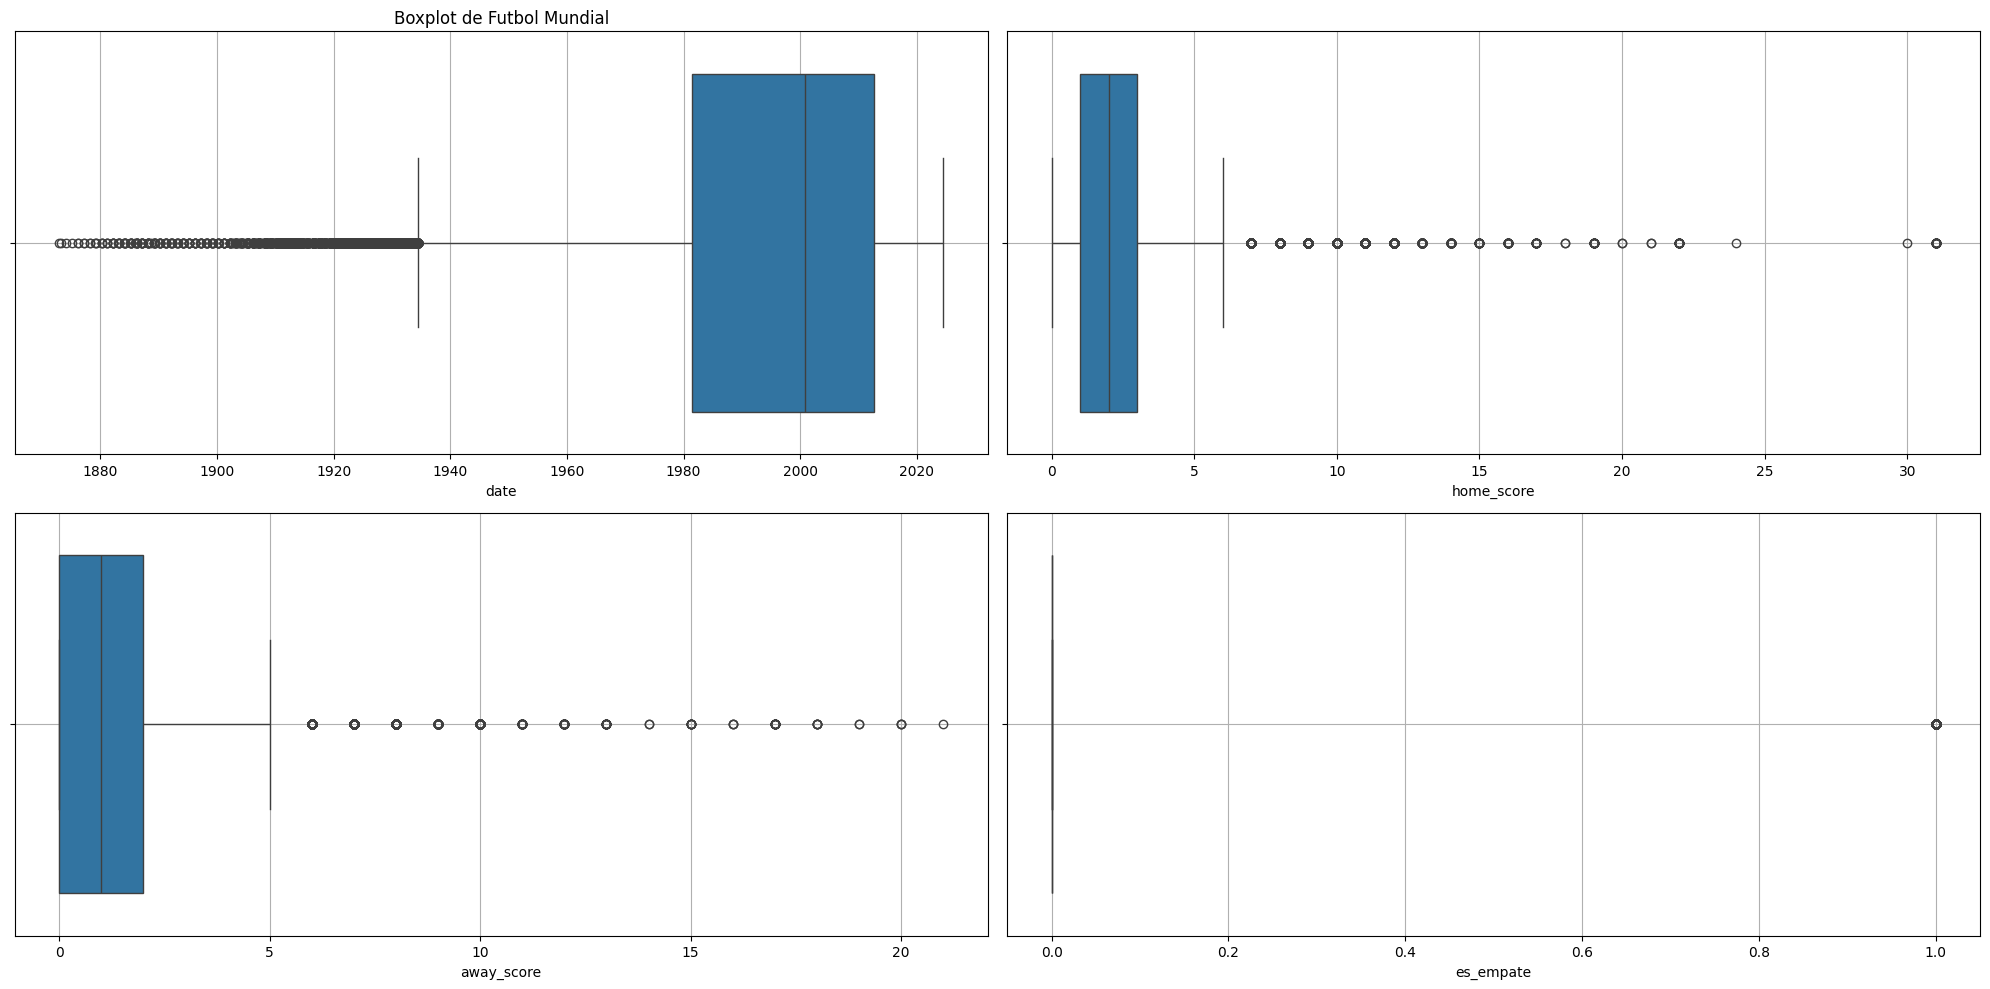

In [1907]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df_merged_final['date'])
plt.title('Boxplot de Futbol Mundial')
plt.xlabel('date')
plt.grid(True)

plt.subplot(2,2,2)
sns.boxplot(x=df_merged_final['home_score'])
plt.xlabel('home_score')
plt.grid(True)

plt.subplot(2,2,3)
sns.boxplot(x=df_merged_final['away_score'])
plt.xlabel('away_score')
plt.grid(True)

plt.subplot(2,2,4)
sns.boxplot(x=df_merged_final['es_empate'])
plt.xlabel('es_empate')
plt.grid(True)

plt.tight_layout()
plt.show()

In [1908]:
df_merged_final['date'].dtype

dtype('<M8[ns]')

In [1909]:
# Obtener una lista de los formatos únicos (si es posible)
unique_formats = df_merged_final['date'].dt.strftime('%Y-%m-%d').unique()
unique_formats

array(['1872-11-30', '1873-03-08', '1874-03-07', ..., '2024-07-10',
       '2024-07-13', '2024-07-14'], dtype=object)

In [1910]:
# Calcular el IQR
Q1 = df_merged_final['date'].quantile(0.25)
Q3 = df_merged_final['date'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Identificar los outliers
outliers = df_merged_final[(df_merged_final['date']
 < limite_inferior) | (df_merged_final['date'] > limite_superior)]

print("Outliers:")
outliers

Outliers:


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1
1,1873-03-08,England,Scotland,England,Desconocido,13.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,24.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
3,1875-03-06,England,Scotland,Empate,Desconocido,52.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,62.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1934-06-10,Italy,Czechoslovakia,Italy,Raimundo Orsi,81.0,False,False,2.0,1.0,FIFA World Cup,Rome,Italy,False,No hay penales,No hay ganador,0
2508,1934-06-10,Italy,Czechoslovakia,Italy,Angelo Schiavio,95.0,False,False,2.0,1.0,FIFA World Cup,Rome,Italy,False,No hay penales,No hay ganador,0
2509,1934-06-10,Lithuania,Latvia,Lithuania,Desconocido,49.0,False,False,2.0,0.0,Friendly,Kaunas,Lithuania,False,No hay penales,No hay ganador,0
2510,1934-06-17,Catalonia,Brazil,Catalonia,Desconocido,76.0,False,False,2.0,1.0,Friendly,Barcelona,Spain,False,No hay penales,No hay ganador,0


COMENTARIO

Los valores outlieres no representan valores mal editados. En el caso de los goles convertidos por el local y el visitante, estos muestran que esan dentro del rango de un partido de futbol, o sea dentro de los 90 minutos de juego.

En el caso de las fechas, estan tampoco muestran u error, sino mas bien, son fechas antiguas que no estan dentro de la gran mayoria de las fechas de todos los partidos de futbol.

Por lo tanto he decidido dejar estos valores atipicos en el conjunto de datos.

# Creacion de variable objetivo

Podemos crear una variable objetivo que tenga en cuenta no solo la Copa del Mundo, sino también el rendimiento en otros torneos, como la Copa América, y cómo esos resultados podrían influir en el rendimiento futuro de Chile. Esto también puede incluir el desempeño de otros equipos como puntos de comparación.

Clasificación para la Copa del Mundo: Considerar si el equipo clasificó para el torneo como un paso importante para ganar el Mundial.

Victoria en torneos: Si Chile (o cualquier otro equipo) ha ganado algún torneo en el pasado, esto podría ser un buen indicador de fortaleza en competencias internacionales. Esto incluiría la Copa América y otros torneos relevantes.

Rendimiento acumulado: Crear una métrica de rendimiento acumulado que refleje el éxito en torneos recientes, por ejemplo, porcentaje de victorias en los últimos 5 torneos.

In [1911]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1
1,1873-03-08,England,Scotland,England,Desconocido,13.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,24.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
3,1875-03-06,England,Scotland,Empate,Desconocido,52.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,62.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0


In [1912]:
df_merged_final['tournament'].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Muratti Vase', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Far Eastern Championship Games', 'Copa Roca', 'Copa América',
       'Peace Cup', 'Open International Championship',
       'Copa Chevallier Boutell', 'Olympic Games', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'Central American and Caribbean Games', 'FIFA World Cup',
       'Copa Rio Branco', 'FIFA World Cup qualification',
       'Bolivarian Games', 'CCCF Championship', 'NAFC Championship',
       'Copa Oswaldo Cruz', 'Asian Games', 'Pan American Championship',
       'Copa del Pacífico', "Copa Bernardo O'Higgins",
       'AFC Asian Cup qualification', 'Atlantic Cup', 'AFC Asian Cup',
       'African Cup of Nations', 'Copa Paz del Chaco',
       'Merdeka Tournament', 'UEFA Euro qualification',
       'Southeast Asian Peninsular

In [1913]:
# Filtrar partidos ganados por Chile
partidos_ganados_chile = df_merged_final[
    (df_merged_final['team'] == 'Chile') &
    ((df_merged_final['home_team'] == 'Chile') & (df_merged_final['home_score'] > df_merged_final['away_score']) |
     (df_merged_final['away_team'] == 'Chile') & (df_merged_final['away_score'] > df_merged_final['home_score']))
]

# Contar el número de partidos ganados por Chile
num_partidos_ganados = partidos_ganados_chile.shape[0]

print(f"Número de partidos ganados por Chile: {num_partidos_ganados}")

# Mostrar los partidos ganados por Chile
print(partidos_ganados_chile[['date', 'home_team', 'away_team', 'home_score', 'away_score']])

Número de partidos ganados por Chile: 585
            date home_team           away_team  home_score  away_score
1283  1926-10-12     Chile             Bolivia         7.0         1.0
1284  1926-10-12     Chile             Bolivia         7.0         1.0
1285  1926-10-12     Chile             Bolivia         7.0         1.0
1286  1926-10-12     Chile             Bolivia         7.0         1.0
1287  1926-10-12     Chile             Bolivia         7.0         1.0
...          ...       ...                 ...         ...         ...
75093 2023-06-11     Chile                Cuba         3.0         0.0
75141 2023-06-16     Chile  Dominican Republic         5.0         0.0
75815 2023-10-12     Chile                Peru         2.0         0.0
76735 2024-03-22   Albania               Chile         0.0         3.0
77009 2024-06-11     Chile            Paraguay         3.0         0.0

[585 rows x 5 columns]


In [1914]:
# Definir una lista de países sudamericanos
equipos_conmebol = ['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia',
                    'Ecuador', 'Paraguay', 'Perú', 'Uruguay', 'Venezuela']

# Crear la columna objetivo multiclase
df_merged_final['objetivo'] = df_merged_final.apply(
    lambda row: 1 if row['team'] == 'Chile' and (
        (row['home_team'] == 'Chile' and row['home_score'] > row['away_score']) or
        (row['away_team'] == 'Chile' and row['away_score'] > row['home_score'])
    ) else
    (2 if row['team'] != 'Chile' and row['team'] in equipos_conmebol and (
        (row['home_team'] == row['team'] and row['home_score'] > row['away_score']) or
        (row['away_team'] == row['team'] and row['away_score'] > row['home_score'])
    ) else
    (3 if row['team'] == 'Chile' and (
        (row['home_team'] == 'Chile' and row['home_score'] < row['away_score']) or
        (row['away_team'] == 'Chile' and row['away_score'] < row['home_score'])
    ) else
    (4 if (row['home_score'] == row['away_score'] and
            (row['home_team'] == 'Chile' or row['away_team'] == 'Chile')) else
    (0 if (row['home_team'] not in equipos_conmebol and row['away_team'] not in equipos_conmebol) else 5)))), axis=1)

# Verificar los valores de la nueva variable objetivo
print(df_merged_final['objetivo'].value_counts(dropna=False))

objetivo
0    69283
5     3615
2     3466
1      585
4      269
3       83
Name: count, dtype: int64


Descripción del Código

Clase 1:

Se asigna a 1 si Chile ha ganado el partido (team es Chile y home_score es mayor que away_score o viceversa).

Clase 2:

Se asigna a 2 si otro equipo sudamericano ha ganado el partido (team no es Chile, pero el equipo está en la lista de equipos_conmebol y cumple con la condición de ganar).

Clase 3:

Se asigna a 3 si Chile ha perdido el partido (cuando team es Chile y ha recibido más goles que su oponente).

Clase 4:

Partidos que terminaron en empate, pero solo si Chile fue uno de los equipos que participó.

Clase 5:

Cualquier otro caso donde Chile no participó, pero al menos uno de los equipos es de Conmebol, se utiliza 5 para denotar que son partidos de equipos sudamericanos que no involucran a Chile.

Clase 0:

Se asigna a 0 solo si ambos equipos en el partido (home_team y away_team) no pertenecen a la lista de equipos de Conmebol.

In [1915]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77301 entries, 0 to 77300
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77301 non-null  datetime64[ns]
 1   home_team      77301 non-null  object        
 2   away_team      77301 non-null  object        
 3   team           77301 non-null  object        
 4   scorer         77301 non-null  object        
 5   minute         77301 non-null  float64       
 6   own_goal       77301 non-null  object        
 7   penalty        77301 non-null  bool          
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         77301 non-null  object        
 15  first_shooter  7730

In [1916]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate,objetivo
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1,0
1,1873-03-08,England,Scotland,England,Desconocido,13.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,24.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0,0
3,1875-03-06,England,Scotland,Empate,Desconocido,52.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1,0
4,1876-03-04,Scotland,England,Scotland,Desconocido,62.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0,0


# Visualizaciones

In [1917]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1918]:
# Filtrar el DataFrame para ver las filas donde 'objetivo' es 1
objetivos_mundiales = df_merged_final[df_merged_final['objetivo'] == 1]

# Mostrar algunas de estas filas
objetivos_mundiales[['date', 'home_team', 'away_team', 'home_score', 'away_score','tournament' ,'winner']].head()

,date,home_team,away_team,home_score,away_score,tournament,winner
1283,1926-10-12,Chile,Bolivia,7.0,1.0,Copa América,No hay penales
1284,1926-10-12,Chile,Bolivia,7.0,1.0,Copa América,No hay penales
1285,1926-10-12,Chile,Bolivia,7.0,1.0,Copa América,No hay penales
1286,1926-10-12,Chile,Bolivia,7.0,1.0,Copa América,No hay penales
1287,1926-10-12,Chile,Bolivia,7.0,1.0,Copa América,No hay penales


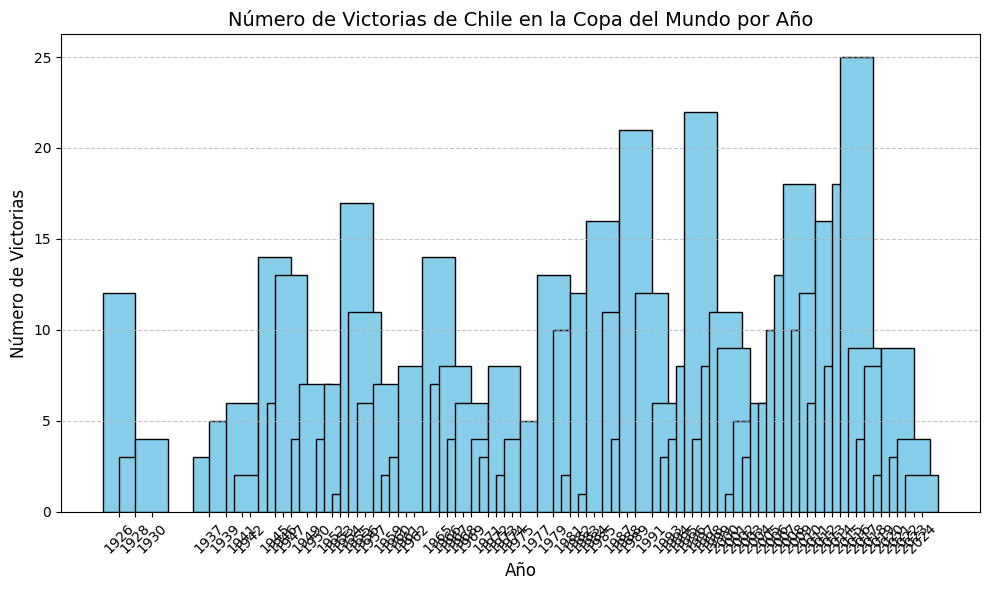

In [1919]:
objetivos_mundiales = df_merged_final[df_merged_final['objetivo'] == 1].copy()

# Asegurarnos de que la columna 'date' esté en formato datetime
objetivos_mundiales['date'] = pd.to_datetime(objetivos_mundiales['date'])

# Crear una nueva columna con el año
objetivos_mundiales['year'] = objetivos_mundiales['date'].dt.year

# Contar el número de partidos ganados por Chile en el Mundial por año
victorias_por_año = objetivos_mundiales['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(victorias_por_año.index, victorias_por_año.values, color='#87CEEB', edgecolor='black', linewidth=1, width=4)
plt.title('Número de Victorias de Chile en la Copa del Mundo por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Victorias', fontsize=12)
plt.xticks(ticks=victorias_por_año.index, labels=victorias_por_año.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

COMENTARIO DEL GRAFICO
 Podemos ver que el rendimiento de Chile en los mundiales que ha participado no es bueno,  aexcepcion del mundial de 1962 donde fue tercero, sin embargo en este mundial Chile era el amfitrion lo que influyo positivamente para que el equipo tuviera un alto rendimiento.

In [1920]:
# Filtrar los datos para obtener los registros donde el torneo es "World Cup"
world_cup_data = df_merged_final[df_merged_final['tournament'] == 'FIFA World Cup']
world_cup_data.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate,objetivo
1855,1930-07-13,Belgium,United States,United States,Bart McGhee,23.0,False,False,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,0
1856,1930-07-13,Belgium,United States,United States,Tom Florie,45.0,False,False,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,0
1857,1930-07-13,Belgium,United States,United States,Bert Patenaude,69.0,False,False,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,0
1858,1930-07-13,France,Mexico,France,Lucien Laurent,19.0,False,False,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,0
1859,1930-07-13,France,Mexico,France,Marcel Langiller,40.0,False,False,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,0


In [1921]:
chile_mundial = world_cup_data[world_cup_data['team'] == 'Chile']

# Mostrar los primeros registros
chile_mundial.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate,objetivo
1871,1930-07-16,Chile,Mexico,Chile,Carlos Vidal,3.0,False,False,3.0,0.0,FIFA World Cup,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,1
1872,1930-07-16,Chile,Mexico,Chile,Manuel Rosas,52.0,True,False,3.0,0.0,FIFA World Cup,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,1
1873,1930-07-16,Chile,Mexico,Chile,Carlos Vidal,65.0,False,False,3.0,0.0,FIFA World Cup,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,1
1892,1930-07-19,Chile,France,Chile,Guillermo Subiabre,67.0,False,False,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,1
1904,1930-07-22,Argentina,Chile,Chile,Guillermo Subiabre,15.0,False,False,3.0,1.0,FIFA World Cup,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,3


In [1922]:

# Filtrar los registros de Chile
chile_mundial = world_cup_data[
    (world_cup_data['home_team'] == 'Chile') | (world_cup_data['away_team'] == 'Chile')
].copy()  # Hacer una copia para evitar advertencias

# Crear una nueva columna con el resultado
chile_mundial['resultado'] = chile_mundial.apply(
    lambda row: 'Victoria' if (row['home_team'] == 'Chile' and row['home_score'] > row['away_score']) or
                    (row['away_team'] == 'Chile' and row['away_score'] > row['home_score']) else
                'Empate' if row['home_score'] == row['away_score'] else 'Derrota',
    axis=1
)

# Agrupar por año y contar los resultados
rendimiento_por_mundial = chile_mundial.groupby(chile_mundial['date'].dt.year)['resultado'].value_counts().unstack().fillna(0)



<Figure size 1000x600 with 0 Axes>

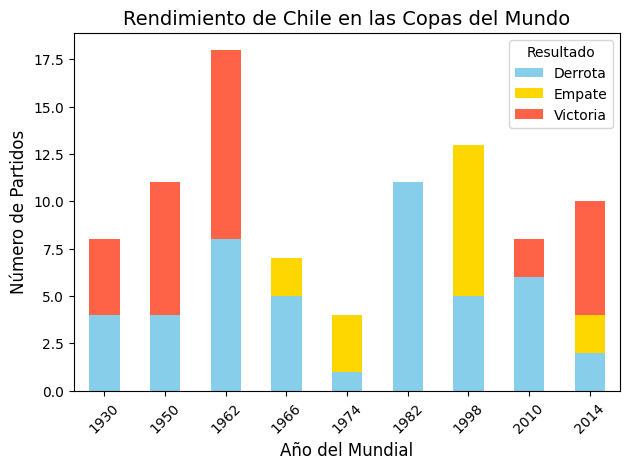

In [1923]:
# Generar el gráfico
plt.figure(figsize=(10, 6))
rendimiento_por_mundial.plot(kind='bar', stacked=True, color=['#87CEEB', '#FFD700', '#FF6347'])
plt.title('Rendimiento de Chile en las Copas del Mundo', fontsize=14)
plt.xlabel('Año del Mundial', fontsize=12)
plt.ylabel('Número de Partidos', fontsize=12)
plt.legend(title='Resultado')
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

COMENTARIO DEL GRAFICO

Podemos ver que el rendimento del equipo ha bajado a medida que se van disputando mas mundiales, el grafico muestra un rendimiento en ascenso hasta el año 1962 (donde obtiene su mejor participacion), sin embargo, hay una baja en el rendimento en los posteriores mundiales, no obtenindo victorias en 4 mundiales y mejorando su participacion en los ultimos dos mundiales, sin mebargo este rendimento sigue siendo bajo.

In [1924]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1925]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77301 entries, 0 to 77300
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77301 non-null  datetime64[ns]
 1   home_team      77301 non-null  object        
 2   away_team      77301 non-null  object        
 3   team           77301 non-null  object        
 4   scorer         77301 non-null  object        
 5   minute         77301 non-null  float64       
 6   own_goal       77301 non-null  object        
 7   penalty        77301 non-null  bool          
 8   home_score     77301 non-null  float64       
 9   away_score     77301 non-null  float64       
 10  tournament     77301 non-null  object        
 11  city           77301 non-null  object        
 12  country        77301 non-null  object        
 13  neutral        77301 non-null  object        
 14  winner         77301 non-null  object        
 15  first_shooter  7730

In [1926]:
correlation_matrix = df_merged_final[["date","minute","own_goal","penalty","home_score","away_score",
                                      "es_empate","objetivo"]].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                date    minute  own_goal   penalty  home_score  away_score  \
date        1.000000  0.022287 -0.050150 -0.013282   -0.079176   -0.068764   
minute      0.022287  1.000000  0.009043  0.028878    0.091091    0.082839   
own_goal   -0.050150  0.009043  1.000000  0.389241    0.155905    0.055283   
penalty    -0.013282  0.028878  0.389241  1.000000    0.134838    0.058581   
home_score -0.079176  0.091091  0.155905  0.134838    1.000000   -0.254957   
away_score -0.068764  0.082839  0.055283  0.058581   -0.254957    1.000000   
es_empate   0.029327 -0.182874 -0.086131 -0.073932   -0.241518   -0.087101   
objetivo   -0.109142 -0.008705 -0.031884 -0.013661   -0.007978    0.006891   

            es_empate  objetivo  
date         0.029327 -0.109142  
minute      -0.182874 -0.008705  
own_goal    -0.086131 -0.031884  
penalty     -0.073932 -0.013661  
home_score  -0.241518 -0.007978  
away_score  -0.087101  0.006891  
es_empate    1.000000  0.070704  

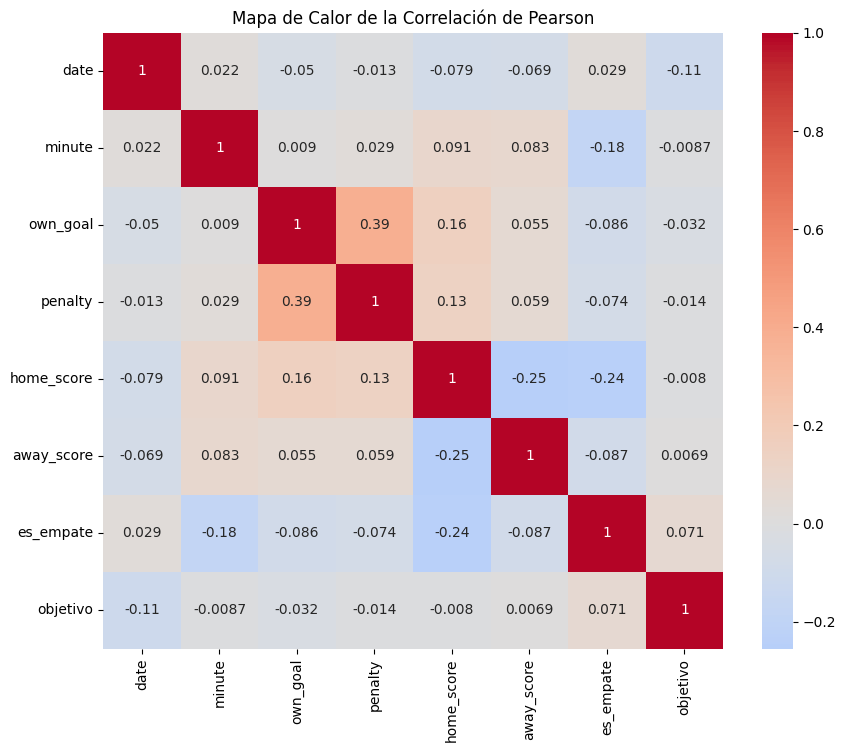

In [1927]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

COMENTARIO MATRIZ DE CORRELACION

La matriz La sugiere que algunos eventos en un partido de fútbol están relacionados. Por ejemplo, los penales y los autogoles parecen estar conectados de alguna manera.

Efecto del resultado: El resultado del partido (empate, victoria local o visitante) tiene una fuerte influencia en otras variables como el número de goles.

Valores cercanos a -1:

Es empate y home score: Tienen una correlación negativa fuerte. Cuando hay un empate, tanto el equipo local como el visitante tienden a tener menos goles.

Valores cercanos a 0:

Fecha y la mayoría de las otras variables: La correlación es muy baja, lo que indica que la fecha del partido no está fuertemente relacionada con las otras variables.

Creacion de variable objetivo:


Nuestra variable objetivo no tiene  correlacion con las variables numericas del dataset

# PREPROCESAMIENTO

In [1928]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate,objetivo
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1,0
1,1873-03-08,England,Scotland,England,Desconocido,13.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,24.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0,0
3,1875-03-06,England,Scotland,Empate,Desconocido,52.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1,0
4,1876-03-04,Scotland,England,Scotland,Desconocido,62.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0,0


COMENTARIO

Tenemos nustro dataFrame con la variable objetivo  creada para predecir el rendineto de Chile y los otros paises de sudamerica en torneos futuros.

la variable objetivo es una variable multiclase donde las clases van de 0 a 5 para identifcar distintas categorias relacionadas con Chile.



# COLUMNA date

COMENTARIO COLUMNA DATE

La columna date la vamos a transformer a columnas numericas de fechas ( año, mes,dia) y de horas (hora, minutos y segundos) para poder transformalas en formato numerico.

In [1929]:
# Asegurarse de que la columna 'Date' esté en formato datetime
df_merged_final['date'] = pd.to_datetime(df_merged_final['date'], errors='coerce')

# Crear nuevas columnas basadas en la columna 'Date'
df_merged_final['Año'] = df_merged_final['date'].dt.year
df_merged_final['Mes'] = df_merged_final['date'].dt.month
df_merged_final['Dia'] = df_merged_final['date'].dt.day
df_merged_final['Hora'] = df_merged_final['date'].dt.hour
df_merged_final['Minutos'] = df_merged_final['date'].dt.minute
df_merged_final['Segundos'] = df_merged_final['date'].dt.second

# Opcional: Eliminar la columna original 'Date' si ya no es necesaria
df_merged_final = df_merged_final.drop(columns=['date'])

# Verificar el dataframe resultante
df_merged_final.head()

,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,...,winner,first_shooter,es_empate,objetivo,Año,Mes,Dia,Hora,Minutos,Segundos
0,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,...,No hay penales,No hay ganador,1,0,1872,11,30,0,0,0
1,England,Scotland,England,Desconocido,13.0,False,False,4.0,2.0,Friendly,...,No hay penales,No hay ganador,0,0,1873,3,8,0,0,0
2,Scotland,England,Scotland,Desconocido,24.0,False,False,2.0,1.0,Friendly,...,No hay penales,No hay ganador,0,0,1874,3,7,0,0,0
3,England,Scotland,Empate,Desconocido,52.0,False,False,2.0,2.0,Friendly,...,No hay penales,No hay ganador,1,0,1875,3,6,0,0,0
4,Scotland,England,Scotland,Desconocido,62.0,False,False,3.0,0.0,Friendly,...,No hay penales,No hay ganador,0,0,1876,3,4,0,0,0


In [1930]:
# Verificar los valores únicos en las columnas 'hour' y 'second'
print("Valores únicos en la columna 'hora':")
print(df_merged_final['Hora'].value_counts())

print("\nValores únicos en la columna 'minutos':")
print(df_merged_final['Minutos'].value_counts())

print("\nValores únicos en la columna 'secondos':")
print(df_merged_final['Segundos'].value_counts())

Valores únicos en la columna 'hora':
Hora
0    77301
Name: count, dtype: int64

Valores únicos en la columna 'minutos':
Minutos
0    77301
Name: count, dtype: int64

Valores únicos en la columna 'secondos':
Segundos
0    77301
Name: count, dtype: int64


COMENTARIO

Al crear nuevas columnas de la variable date, las columnas de horas, minutos y segundos no tienen informacion, tienen puros ceros, por lo tanto eliminaremos estas columnas que no aportan informacion para nuestro analisis

In [1931]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77301 entries, 0 to 77300
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   home_team      77301 non-null  object 
 1   away_team      77301 non-null  object 
 2   team           77301 non-null  object 
 3   scorer         77301 non-null  object 
 4   minute         77301 non-null  float64
 5   own_goal       77301 non-null  object 
 6   penalty        77301 non-null  bool   
 7   home_score     77301 non-null  float64
 8   away_score     77301 non-null  float64
 9   tournament     77301 non-null  object 
 10  city           77301 non-null  object 
 11  country        77301 non-null  object 
 12  neutral        77301 non-null  object 
 13  winner         77301 non-null  object 
 14  first_shooter  77301 non-null  object 
 15  es_empate      77301 non-null  int64  
 16  objetivo       77301 non-null  int64  
 17  Año            77301 non-null  int32  
 18  Mes   

In [1932]:
# Eliminar las columnas 'hour' y 'second' ya que no contienen información relevante
df_merged_final.drop(columns=['Hora', 'Minutos', 'Segundos'], inplace=True)


COMENTARIO

Cambiaremos el tipo de dato para nuestras columnas booleanas para que el ColumnTransformer funcione.

In [1933]:
bool_columns = df_merged_final.select_dtypes(include=['bool']).columns.tolist()

# Convertir las columnas booleanas a enteros
for col in bool_columns:
    df_merged_final[col] = df_merged_final[col].astype(int)

# Verificar los cambios
print(df_merged_final[bool_columns].head())

   penalty
0        0
1        0
2        0
3        0
4        0


In [1934]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77301 entries, 0 to 77300
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   home_team      77301 non-null  object 
 1   away_team      77301 non-null  object 
 2   team           77301 non-null  object 
 3   scorer         77301 non-null  object 
 4   minute         77301 non-null  float64
 5   own_goal       77301 non-null  object 
 6   penalty        77301 non-null  int64  
 7   home_score     77301 non-null  float64
 8   away_score     77301 non-null  float64
 9   tournament     77301 non-null  object 
 10  city           77301 non-null  object 
 11  country        77301 non-null  object 
 12  neutral        77301 non-null  object 
 13  winner         77301 non-null  object 
 14  first_shooter  77301 non-null  object 
 15  es_empate      77301 non-null  int64  
 16  objetivo       77301 non-null  int64  
 17  Año            77301 non-null  int32  
 18  Mes   

COMENTARIO

Elimaremos la columa creada es empate ya que esta informacion ya se encuentra en el conjunto de datos originales. Esta columna fue creada para poder imputar los valores NaN en las columnas de winner y first_shooter, por lo tanto, no deberia afectar la eliminacion de esta columna a nuestros analisis posteriores.

In [1935]:
import pandas as pd

In [1936]:

columna_a_eliminar = ["es_empate"]
df_merged_final = df_merged_final.drop(columna_a_eliminar, axis=1)

In [1937]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77301 entries, 0 to 77300
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   home_team      77301 non-null  object 
 1   away_team      77301 non-null  object 
 2   team           77301 non-null  object 
 3   scorer         77301 non-null  object 
 4   minute         77301 non-null  float64
 5   own_goal       77301 non-null  object 
 6   penalty        77301 non-null  int64  
 7   home_score     77301 non-null  float64
 8   away_score     77301 non-null  float64
 9   tournament     77301 non-null  object 
 10  city           77301 non-null  object 
 11  country        77301 non-null  object 
 12  neutral        77301 non-null  object 
 13  winner         77301 non-null  object 
 14  first_shooter  77301 non-null  object 
 15  objetivo       77301 non-null  int64  
 16  Año            77301 non-null  int32  
 17  Mes            77301 non-null  int32  
 18  Dia   

In [1938]:
df_merged_final.duplicated().sum()

0

In [1939]:
!pip install dask[dataframe]

In [1940]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import FunctionTransformer

In [1941]:
# Definir columnas a eliminar del dataset para la variable X
columnas_a_eliminar = ['objetivo', 'home_team', 'away_team', 'city', 'country', 'neutral', 'first_shooter', 'scorer']

In [1942]:
# Eliminar las columnas del dataset
X = df_merged_final.drop(columns=columnas_a_eliminar)
y = df_merged_final['objetivo']

In [1943]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1944]:
# Definir las columnas numéricas y categóricas
variables_num = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
variables_cat = ["team", "tournament", "winner"]

# Crear el Pipeline para las columnas numéricas (incluyendo PCA)
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()), # Estandarizar las variables numéricas
    ("pca", PCA(n_components=0.9)) # Reducción de dimensionalidad manteniendo el 90% de la varianza
])

# Crear el Pipeline para las columnas categóricas
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Incluir ColumnTransformer para agrupar todas las transformaciones
preprocessor = ColumnTransformer([
    ("num", num_transformer, variables_num),
    ("cat", cat_transformer, variables_cat)
])

In [1945]:
# Aplicar el ColumnTransformer en los datos de entrenamiento
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [1946]:
# Definir los modelos a evaluar
model_LR = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, tol=1e-4, random_state=42, class_weight='balanced')
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=len(X.columns), random_state=42, class_weight='balanced')
model_forest = RandomForestClassifier(n_estimators=100, max_depth=len(X.columns), random_state=42, class_weight='balanced')

In [1947]:
# Definir los pipelines de los modelos
pipe_LR = Pipeline(steps=[("preprocessor", preprocessor), ("model", model_LR)])
pipe_tree = Pipeline(steps=[("preprocessor", preprocessor), ("model", model_tree)])
pipe_forest = Pipeline(steps=[("preprocessor", preprocessor), ("model", model_forest)])

In [1948]:
# Crear una lista de pipelines y sus nombres para evaluar
pipelines = [pipe_LR, pipe_tree, pipe_forest]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]

In [1949]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


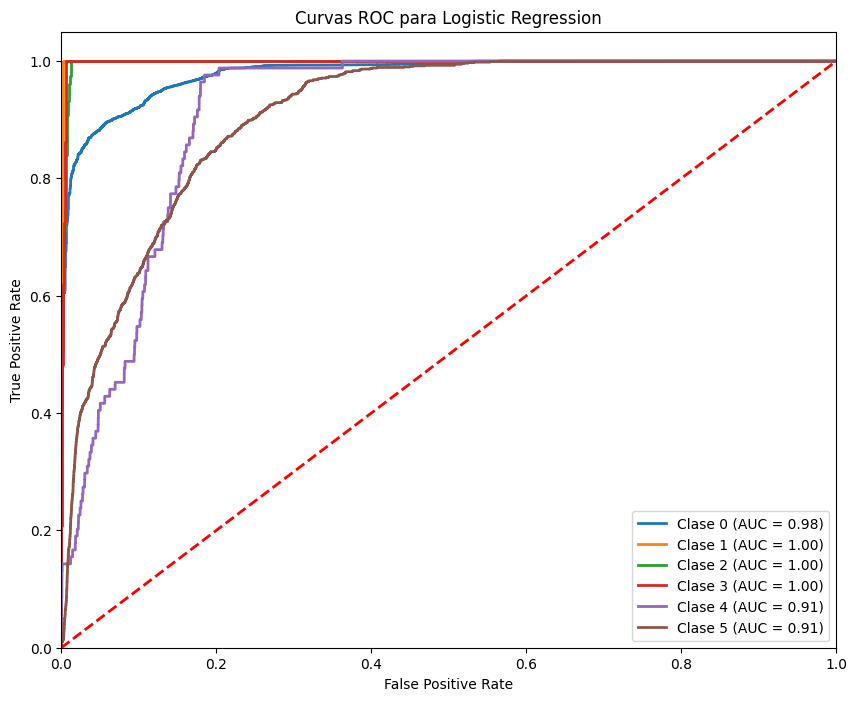

Logistic Regression - ROC AUC: 0.9650 (+/- 0.0026)


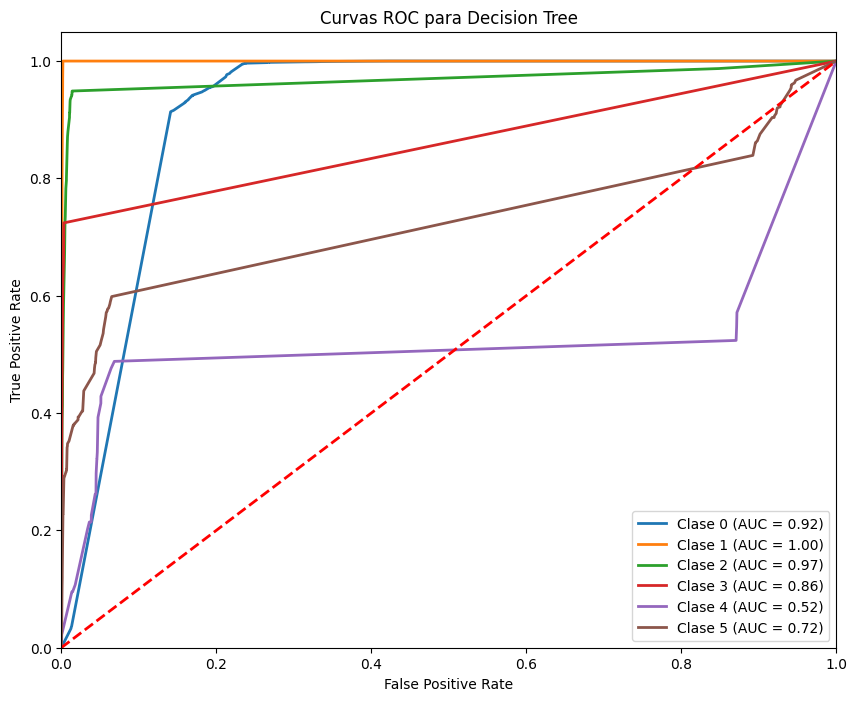

Decision Tree - ROC AUC: 0.7896 (+/- 0.0290)


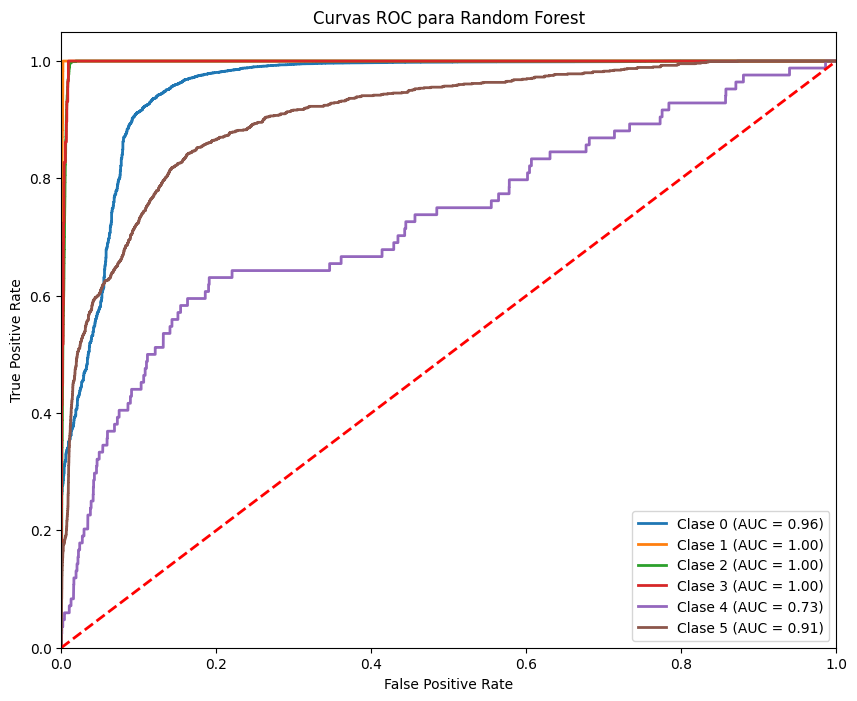

Random Forest - ROC AUC: 0.9343 (+/- 0.0100)


In [1950]:
# cantidad de clases de nuestra variable objetivo
n_classes = 6

# Binarizar las etiquetas de la variable objetivo
y_train_bin = label_binarize(y_train, classes=np.arange(n_classes))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Evaluar cada modelo usando validación cruzada directamente con el pipeline y sin transformar fuera del pipeline
for pipe, name in zip(pipelines, model_names):
    # Ajustar el modelo y obtener las probabilidades de predicción
    pipe.fit(X_train, y_train)
    y_probs = pipe.predict_proba(X_test)  # Probabilidades para todas las clases

    # Graficar la curva ROC para cada clase
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Clase {i} (AUC = {roc_auc:.2f})')

    # Graficar la línea diagonal
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Línea diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curvas ROC para {name}')
    plt.legend(loc='lower right')
    plt.show()

    # También puedes mostrar el resultado de validación cruzada
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
    print(f"{name} - ROC AUC: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

COMENTARIO

El gráfico muestra que el modelo de Regresión Logística tiene un desempeño muy bueno en general, con AUC altos para todas las clases. Esto significa que el modelo es bastante preciso en la mayoría de los casos, lo que lo convierte en una buena opción para predecir el rendimiento de las selecciones sudamericanas. Sin embargo, se debe tener cuidado con las clases que tienen menos soporte o presentan menor AUC (como las clases 4 y 5), ya que el modelo podría necesitar más ajustes o datos para mejorar en esas áreas.

El modelo Decision Tree muestra un excelente rendimiento para las clases 1 y 2, y un buen rendimiento para las clases 0 y 3. Esto sugiere que el modelo es bastante capaz de distinguir estas clases.

Sin embargo, el rendimiento disminuye significativamente para las clases 4 y 5, como se refleja en los valores de AUC más bajos (0.52 y 0.72). Este resultado puede deberse a una distribución desequilibrada de los datos o a que las características utilizadas no son lo suficientemente discriminativas para estas clases.

El modelo Random Forest muestra un rendimiento sobresaliente para las clases 1, 2 y 3.

El rendimiento es muy alto para la clase 0, con un AUC de 0.96.

Sin embargo, para la clase 4 (AUC = 0.73), el modelo tiene dificultades para diferenciar correctamente. Esto podría deberse a una representación insuficiente de esta clase en los datos, características menos informativas o un desequilibrio en la distribución de clases.

La clase 5 (AUC = 0.91) tiene un rendimiento aceptable, pero aún presenta margen de mejora comparado con las clases superiores.

In [1954]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
Accuracy: 0.8593
ROC AUC: 0.9656
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     20788
           1       0.90      0.62      0.73       171
           2       0.80      0.97      0.88      1018
           3       0.20      0.72      0.31        29
           4       0.02      0.45      0.04        84
           5       0.33      0.53      0.41      1101

    accuracy                           0.86     23191
   macro avg       0.54      0.69      0.55     23191
weighted avg       0.95      0.86      0.90     23191



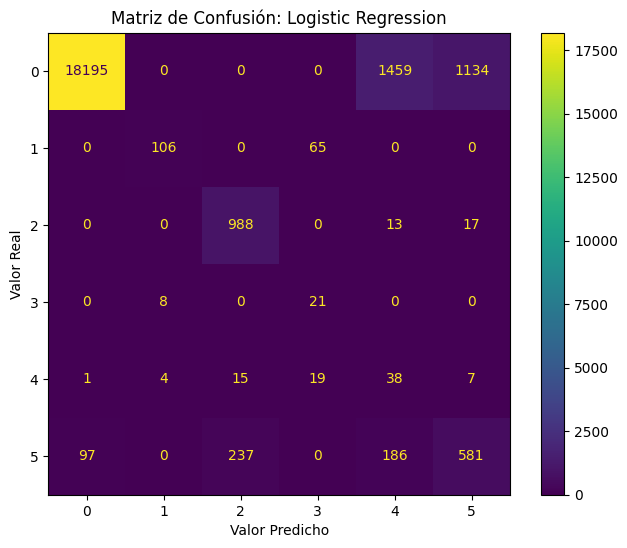


Model: Decision Tree
Accuracy: 0.8891
ROC AUC: 0.8321
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     20788
           1       0.86      0.80      0.83       171
           2       0.83      0.87      0.85      1018
           3       0.29      0.62      0.40        29
           4       0.02      0.26      0.04        84
           5       0.36      0.48      0.41      1101

    accuracy                           0.89     23191
   macro avg       0.56      0.66      0.58     23191
weighted avg       0.94      0.89      0.91     23191



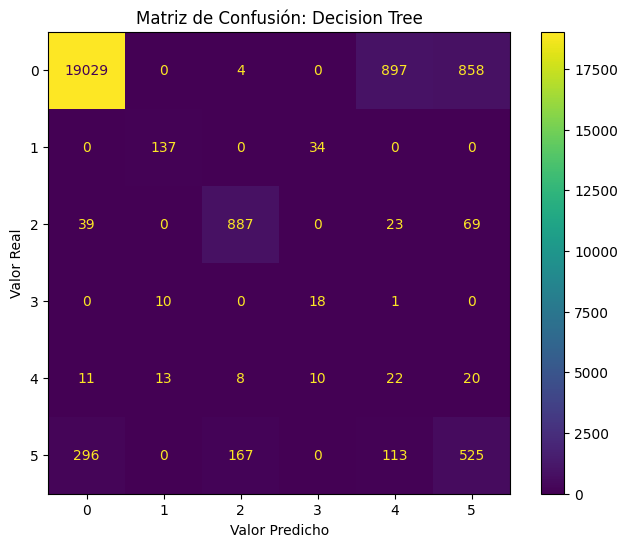


Model: Random Forest
Accuracy: 0.8727
ROC AUC: 0.9307
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     20788
           1       0.83      0.91      0.87       171
           2       0.82      0.98      0.90      1018
           3       0.29      0.38      0.33        29
           4       0.02      0.44      0.03        84
           5       0.52      0.49      0.51      1101

    accuracy                           0.87     23191
   macro avg       0.58      0.68      0.60     23191
weighted avg       0.96      0.87      0.91     23191



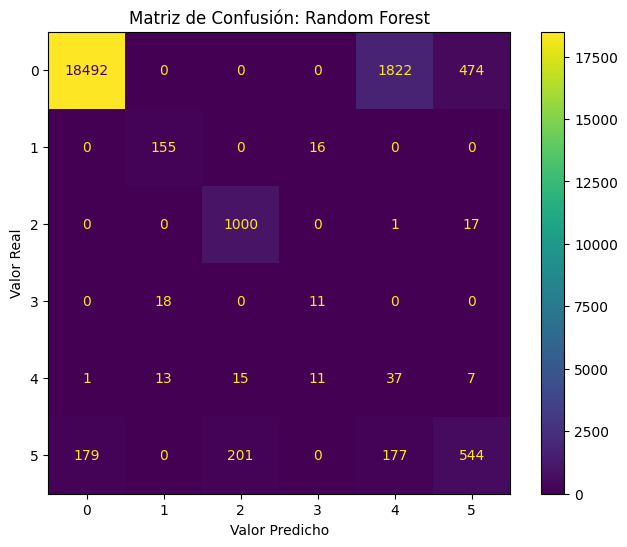

In [1956]:
# Entrenar y evaluar cada modelo en el conjunto de prueba usando directamente los datos originales (sin transformar)
for pipe, name in zip(pipelines, model_names):
    # Entrenar el pipeline con los datos originales
    pipe.fit(X_train, y_train)

    # Predecir en el conjunto de prueba usando el pipeline
    y_pred = pipe.predict(X_test)

    # Predecir las probabilidades
    y_probs = pipe.predict_proba(X_test)  # Obtiene las probabilidades para todas las clases

    # Evaluar y mostrar los resultados
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # Calcular el ROC AUC
    roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
    print(f"ROC AUC: {roc_auc:.4f}")

    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Graficar la matriz de confusión usando ConfusionMatrixDisplay
    cm2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

    fig, ax = plt.subplots(figsize=(8, 6))
    cm2.plot(ax=ax)
    plt.title(f'Matriz de Confusión: {name}')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')

    plt.show()


COMENTARIO REPORTE DE CLASIFICACION

# Modelo: Logistic Regression

Accuracy: 0.8593

Interpretación: Aproximadamente el 85.93% de las predicciones realizadas por el modelo son correctas. Esto sugiere que el modelo está haciendo un buen trabajo en general, aunque la precisión puede ser engañosa si hay un desbalance en las clases.

ROC AUC: 0.9656

Interpretación: Un AUC de 0.9656 es excelente, indicando que el modelo tiene una alta capacidad para distinguir entre las clases. Este valor sugiere que, en promedio, el modelo tiene una buena tasa de verdaderos positivos a cambio de falsos positivos.

**Detalles del Classification Report**

El reporte de clasificación desglosa el rendimiento del modelo para cada clase. Aquí se analiza cada métrica:

Precision: Es la proporción de verdaderos positivos sobre el total de positivos predichos. Indica cuántas de las instancias predichas como positivas son realmente positivas.

Recall: Es la proporción de verdaderos positivos sobre el total de positivos reales. Indica cuántas de las instancias realmente positivas fueron identificadas correctamente por el modelo.

F1-score: Es la media armónica entre precisión y recall. Ofrece un balance entre ambas métricas y es especialmente útil en casos de clases desbalanceadas.

Support: Es el número de instancias verdaderas de cada clase en el conjunto de prueba.

Resultados por Clase

Clase 0:

Precision: 0.99

Recall: 0.88

F1-score: 0.93

Support: 20788

Interpretación: Excelente rendimiento; el modelo tiene una alta precisión y un buen recall, lo que indica que identifica correctamente la mayoría de los ejemplos de esta clase.

Clase 1:

Precision: 0.90

Recall: 0.62

F1-score: 0.73

Support: 171

Interpretación: Aunque la precisión es alta, el recall es relativamente bajo, lo que significa que el modelo tiene dificultades para identificar todas las instancias de esta clase. hay un desbalance significativo que afecta el rendimiento, debido a que la clase 1 representa a los partidos ganados por el equipo chileno lo que no son muchos partidos considerando el volumne de partidos que hay en este conjunto de datos.

Clase 2:

Precision: 0.80

Recall: 0.97

F1-score: 0.88

Support: 1018

Interpretación: Buen rendimiento, especialmente en recall, lo que indica que el modelo identifica correctamente muchas instancias de esta clase. Sin embargo, la precisión muestra que también hay algunas falsedades positivas.

Clase 3:

Precision: 0.20

Recall: 0.72

F1-score: 0.31

Support: 29

Interpretación: Muy bajo rendimiento en precisión, a pesar de un recall relativamente alto. Esto indica que el modelo frecuentemente clasifica incorrectamente otras clases como Clase 3.

Clase 4:

Precision: 0.02

Recall: 0.45

F1-score: 0.04

Support: 84

Interpretación: Desempeño muy pobre; el modelo tiene una baja precisión y un recall moderado. Esto sugiere que hay una alta tasa de falsedades positivas y que el modelo no está capturando adecuadamente esta clase.

Clase 5:

Precision: 0.33

Recall: 0.53

F1-score: 0.41

Support: 1101

Interpretación: Un desempeño moderado, pero todavía hay una cantidad significativa de falsedades positivas. Necesita mejoras.

Promedios Generales

Accuracy: 0.86 indica que, a pesar de algunos problemas en clases específicas, el modelo está funcionando adecuadamente en general.

Macro Avg:

Precision: 0.54

Recall: 0.69

F1-score: 0.55

Interpretación: Promedio simple sin ponderar. Refleja que el modelo tiene un rendimiento desigual entre las clases, especialmente en clases menores.

Weighted Avg:

Precision: 0.95

Recall: 0.86

F1-score: 0.90

Interpretación: Promedio ponderado por el soporte, lo que muestra que el modelo tiene un rendimiento general fuerte, pero las métricas de las clases menores arrastran las métricas generales.


# Modelo: Decision Tree

Accuracy: 0.8891

Interpretación: Aproximadamente el 88.91% de las predicciones realizadas por el modelo son correctas. Esto indica que el modelo tiene un buen rendimiento general, lo que sugiere que es capaz de clasificar la mayoría de las instancias correctamente.

ROC AUC: 0.8321

Interpretación: Un AUC de 0.8321 indica una buena capacidad del modelo para diferenciar entre las clases. Aunque no es tan alto como el de la regresión logística, sigue mostrando un rendimiento aceptable en términos de clasificación.

Detalles del Classification Report

El reporte de clasificación desglosa el rendimiento del modelo para cada clase. Aquí se analiza cada métrica:

Resultados por Clase

Clase 0:

Precision: 0.98

Recall: 0.92

F1-score: 0.95

Support: 20788

Interpretación: Excelente rendimiento. El modelo tiene una alta precisión y un buen recall, lo que indica que identifica correctamente la mayoría de las instancias de esta clase.

Clase 1:

Precision: 0.86

Recall: 0.80

F1-score: 0.83

Support: 171

Interpretación: Buen rendimiento en general, aunque hay margen de mejora en el recall, lo que sugiere que el modelo no está identificando todas las instancias de esta clase.

Clase 2:

Precision: 0.83

Recall: 0.87

F1-score: 0.85

Support: 1018

Interpretación: Buen rendimiento, con un equilibrio razonable entre precisión y recall. El modelo identifica bien esta clase.

Clase 3:

Precision: 0.29

Recall: 0.62

F1-score: 0.40

Support: 29

Interpretación: Bajo rendimiento en precisión, lo que indica que el modelo frecuentemente clasifica incorrectamente otras clases como Clase 3, aunque tiene un recall más alto, lo que sugiere que está capturando algunas instancias correctamente.

Clase 4:

Precision: 0.02

Recall: 0.26

F1-score: 0.04

Support: 84

Interpretación: Desempeño muy pobre, tanto en precisión como en recall. El modelo no está capturando adecuadamente esta clase, lo que indica que es una clase difícil de predecir.

Clase 5:

Precision: 0.36

Recall: 0.48

F1-score: 0.41

Support: 1101

Interpretación: Un rendimiento moderado; el modelo tiene un recall relativamente bajo y una precisión igualmente limitada, lo que indica que podría beneficiarse de mejoras en la clasificación de esta clase.

Promedios Generales

Accuracy: 0.89 indica que, en general, el modelo está funcionando bien, aunque las clases específicas tienen variaciones significativas en el rendimiento.

Macro Avg:

Precision: 0.56

Recall: 0.66

F1-score: 0.58

Interpretación: Promedio simple sin ponderar que indica que el modelo tiene un rendimiento desigual entre las clases, especialmente en clases menos representadas.

Weighted Avg:

Precision: 0.94

Recall: 0.89

F1-score: 0.91

Interpretación: Promedio ponderado que muestra un rendimiento general fuerte, destacando que las métricas de las clases más grandes están afectando positivamente las métricas generales.

# Modelo: Random Forest

Accuracy: 0.8727

Interpretación: Aproximadamente el 87.27% de las predicciones realizadas por el modelo son correctas. Esto sugiere un rendimiento sólido en general, aunque no tan alto como el de la regresión logística.

ROC AUC: 0.9307

Interpretación: Un AUC de 0.9307 indica que el modelo tiene una buena capacidad para diferenciar entre las clases. Es un valor fuerte que sugiere un buen rendimiento en términos de clasificación binaria.

Detalles del Classification Report

El reporte de clasificación desglosa el rendimiento del modelo para cada clase. Aquí se analizan las métricas de cada clase:

Resultados por Clase

Clase 0:

Precision: 0.99

Recall: 0.89

F1-score: 0.94

Support: 20788

Interpretación: Excelente rendimiento. El modelo tiene una alta precisión y un buen recall, indicando que identifica correctamente la mayoría de las instancias de esta clase.

Clase 1:

Precision: 0.83

Recall: 0.91

F1-score: 0.87

Support: 171

Interpretación: Buen rendimiento, con una alta capacidad para identificar instancias reales de la clase (recall alto) y una precisión razonable.

Clase 2:

Precision: 0.82

Recall: 0.98

F1-score: 0.90

Support: 1018

Interpretación: Buen equilibrio entre precisión y recall, lo que indica que el modelo identifica bien esta clase.

Clase 3:

Precision: 0.29

Recall: 0.38

F1-score: 0.33

Support: 29

Interpretación: Desempeño pobre, tanto en precisión como en recall. Esto sugiere que el modelo frecuentemente clasifica incorrectamente otras clases como Clase 3.

Clase 4:

Precision: 0.02

Recall: 0.44

F1-score: 0.03

Support: 84

Interpretación: Desempeño muy pobre. Aunque el recall es relativamente alto, la precisión es muy baja, lo que indica que el modelo está identificando incorrectamente muchas instancias de otras clases.

Clase 5:

Precision: 0.52

Recall: 0.49

F1-score: 0.51

Support: 1101

Interpretación: Un rendimiento moderado; el modelo tiene un equilibrio entre precisión y recall, pero aún tiene margen para mejorar en la clasificación de esta clase.

Promedios Generales

Accuracy: 0.87 indica un buen rendimiento general del modelo.

Macro Avg:

Precision: 0.58

Recall: 0.68

F1-score: 0.60

Interpretación: Promedio simple sin ponderar que muestra que el rendimiento es desigual entre las clases, especialmente en clases menos representadas.

Weighted Avg:

Precision: 0.96

Recall: 0.87

F1-score: 0.91

Interpretación: Promedio ponderado que muestra un rendimiento general fuerte, destacando que las métricas de las clases más grandes están afectando positivamente las métricas generales.

# COMENTARIO FINAL

Métricas de Clasificación por Clase

# Regresión Logística:

Presenta un rendimiento excelente en la clase 0, pero un rendimiento deficiente en las clases menos representadas. Esto puede ser un problema al tratar de predecir eventos menos comunes, como ganar un campeonato.

# Árbol de Decisión:

Tiene un rendimiento más equilibrado en todas las clases en comparación con la regresión logística, aunque todavía muestra debilidades significativas en las clases menos representadas.

# Random Forest:

Proporciona un rendimiento sólido en general, aunque también presenta debilidades en las clases 3, 4 y 5. Sin embargo, es el que mejor maneja la imprecisión en clases menos frecuentes.

# Interpretabilidad

Regresión Logística: Es el más fácil de interpretar y explicar, lo que puede ser útil al presentar resultados a audiencias no técnicas.

Árbol de Decisión: Es también relativamente fácil de interpretar, aunque puede volverse complejo si el árbol se hace grande.

Random Forest: Menos interpretable debido a la naturaleza de múltiples árboles, lo que puede dificultar la comprensión de cómo se toman las decisiones.

# Generalización y Robustez

Random Forest tiende a generalizar mejor en comparación con los modelos de árbol de decisión y regresión logística, ya que reduce la varianza al combinar múltiples modelos. Esto puede ser beneficioso para predecir resultados en eventos futuros, donde el modelo debe adaptarse a nuevas situaciones.